# Assignment 3
Assignments are an individual assessment, you should not work in groups.

You will be turning in:

1. A README.md with all the relevant information. Please see example on Canvas under the Course Docs module.
2. An .ipynb with just your code (show all code necessary for the analysis, but remove superfluous code)
3. A PDF with your Report (see [Google Docs Template](https://docs.google.com/document/d/1idQDg0U4X4NCEfdLy3YV72njgt8KOmuv7ujv1soxiF4/edit?usp=sharing))


## Data

We're going to do some customer segmentation for a **media company** (a digital magazine) to help them understand the needs of their customers better, and put them into useful groups of similar clusters. There are two datasets each of which is a random sample of `200` customers.

### Behavioral Data

[This dataset](https://github.com/katherinehansen2/CPSC392Hansen/blob/main/data/HW3_behavioral.csv) contains information about the media company customers' behavior on the site. The variables in the customer data include:

- `id`: customer id
- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: age in years
- `current_income`: self-reported current annual income in thousands
- `time_spent_browsing`: average number of minutes spent browsing website per month
- `prop_ad_clicks`: proportion of website ads that they click on (between `0` and `1`)
- `longest_read_time`: longest time spent consecutively on website in minutes
- `length_of_subscription`: number of days subscribed to the magazine
- `monthly_visits`: average number of visits to the site per month



### Article Data

[This dataset](https://github.com/katherinehansen2/CPSC392Hansen/blob/main/data/HW3_topics.csv) contains information about the number of articles customers read in each topic in the past 3 months. The topics in the customer data include:

- `Stocks`
- `Productivity`
- `Fashion`
- `Celebrity`
- `Cryptocurrency`
- `Science`
- `Technology`
- `SelfHelp`
- `Fitness`
- `AI`

## 1. Behavioral Clustering
- Make ggplot scatterplots of pairs of your features to give you a little bit of information about the data, and to help you decide which algorithm to use (you don’t need to make scatterplots for all possible pairs of features, just make sure each feature appears at least once).
- Using `sklearn` build and fit **one** clustering model (choose from **K-Means**, **Gaussian Mixture Models**, **DBSCAN**, and **Hierarchical Clustering**) using all the continuous/interval variables *except* `id`.
- Appropriately Z-score continuous/interval variables.
- Choose the number of clusters (if applicable) and in the **Methods** section of your report, explain how you chose. Also explain **why/how** you chose any relevant hyperparameters (such as linkage, distance metric, eps, min samples...).
- In the **Methods** section of your report, explain **in detail** both the *pros* and *cons* of the all the clustering models (e.g. what type of data do they work well for? Are there any possible downsides of using them?) and *provide a justification* for why you chose the clustering algorithm that you did.
- Using **plotnine/ggplot** and **PCA**, create a scatterplot of your clusters by plotting the first Principal Component (PC1) on the x-axis, and the second Principal Component (PC2) on the y-axis. Color the points by their cluster. Include this plot in your **Results** Section. Plots made with other libraries will recieve a score of 0 for this section.
- (DO NOT cluster on the PCs, you're only using the PCs to visualize the clusters you fit on the original features)
- Create at least one *other* summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail:
    - what kind of customers are in each cluster
    - how the clusters "performed" (e.g. are they good clusters? How can you tell?)
    - how that information might help the company



## 2. Article Clustering
- Using `sklearn` build and fit a **Hierarchical Clustering** model using all the variables *except* `id`. Use cosine similarity as your distance metric (also called `affinity`) and `average` linkage.
- Do **not** z-score, as these are counts.
- Create a dendrogram and use it to determine the number of clusters you'll use. In the **Methods** section of your report, explain **what number** of cluster you decided to use and **why**.
- In the **Results** section, discuss the performance of the model based on the dendrogram.
- Create at least one other summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail what kind of customers are in each cluster, and how that information might help the company.

## 3. Report

[DOCS TEMPLATE HERE](https://docs.google.com/document/d/1idQDg0U4X4NCEfdLy3YV72njgt8KOmuv7ujv1soxiF4/edit?usp=sharing)

Your Technical Report is a way to practice presenting and formatting your results like you would in industry. Make sure your report and **plots** are clear, and explain things clearly. Write a report that has the following sections:

1. **Introduction**: description of the problem (e.g. what are you predicting? what variables do you have available? How might this model be useful if you are successful). You should end with a sentence or two about what the impact of these models could be.

2. **Methods**: describe your models in detail (as if explaining them to the CEO of the media company), as well as any pre-processing you had to do to the data.

3. **Results**: How did your models perform? Describe the clusters from your Behavioral Clustering models. Were they different? If so, how? What could the CEO of the media company do with these clusters? Describe the clusters form your Article Clustering model. What could the CEO of the media company do with these clusters?

4. **Discussion/Reflection**: A few sentences about what you learned from performing these analyses, and at least one suggestion for what you'd add or do differently if you were to perform this analysis again in the future.

In [1]:
#imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch

%matplotlib inline

**BEHAVIORAL CLUSTERING**

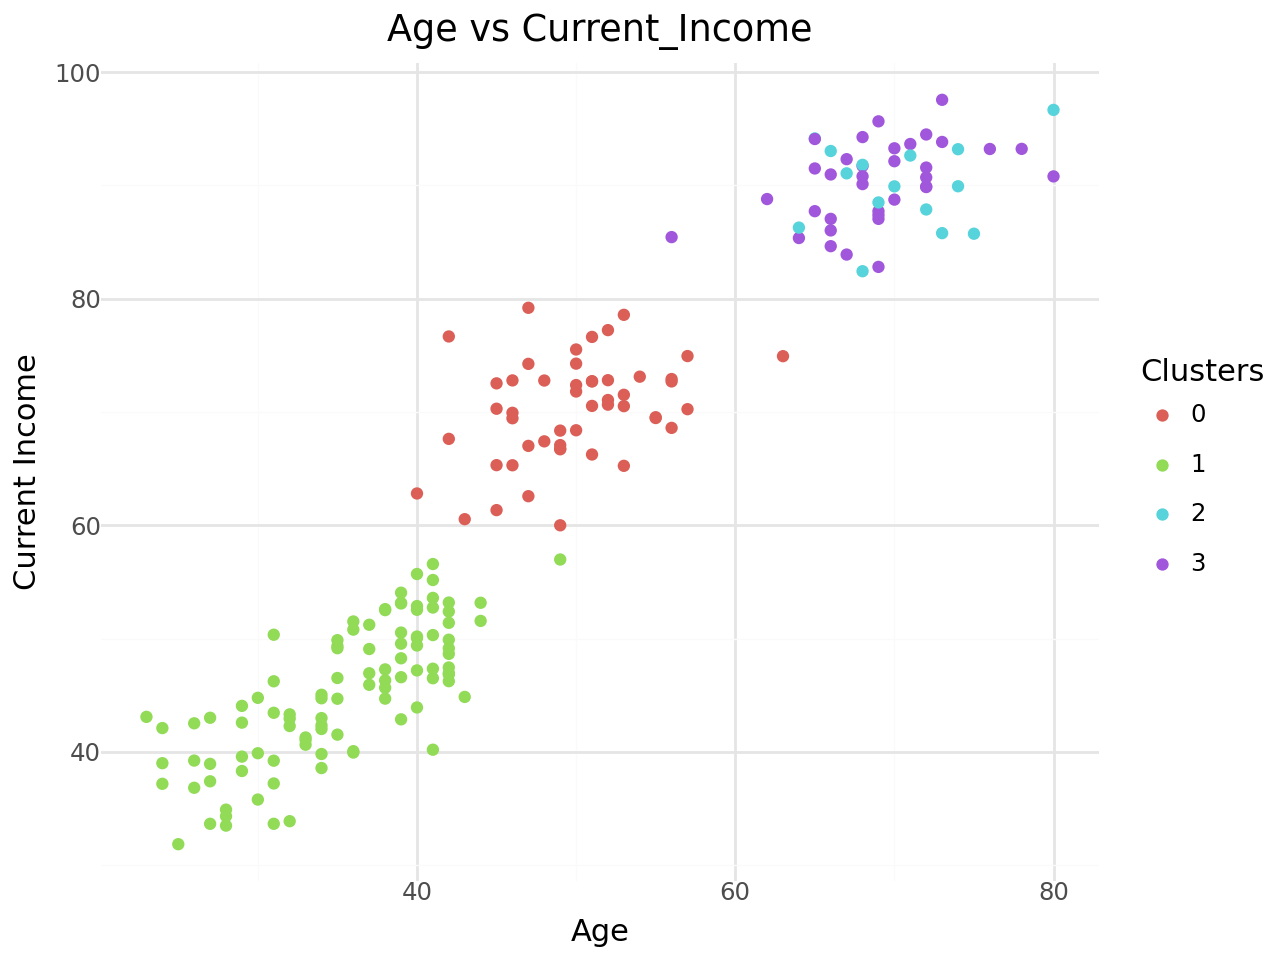

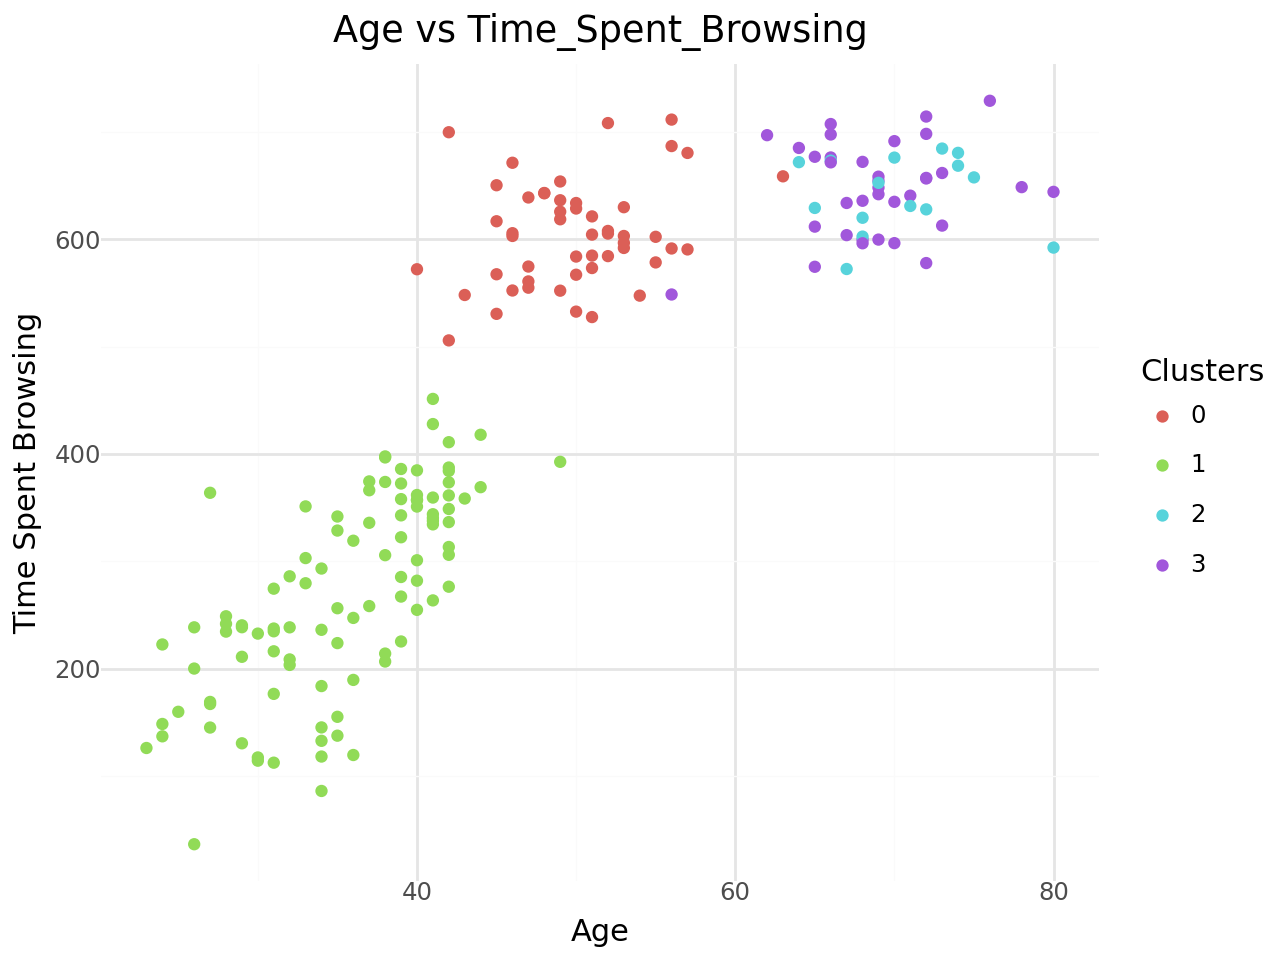

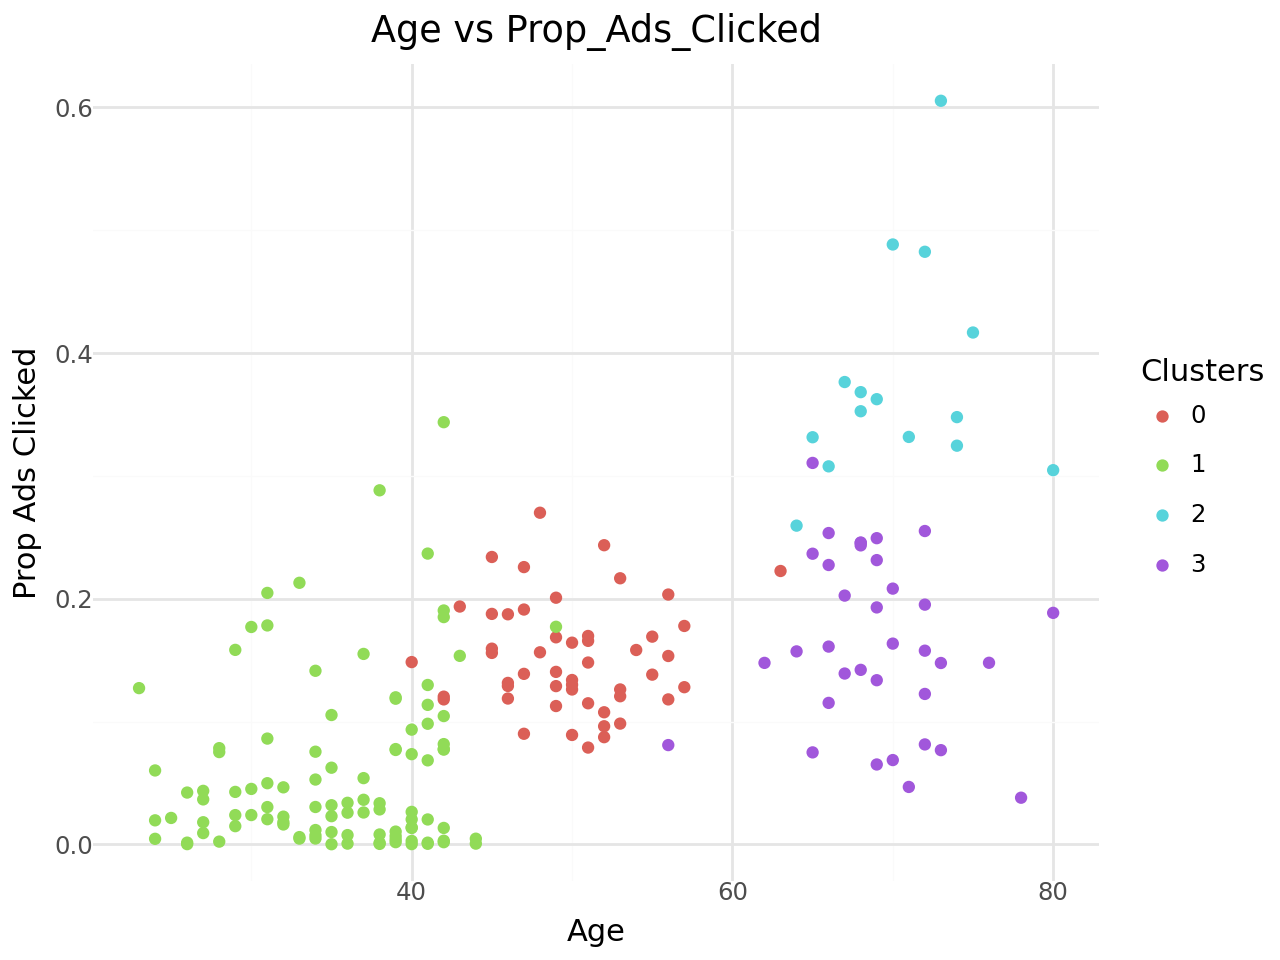

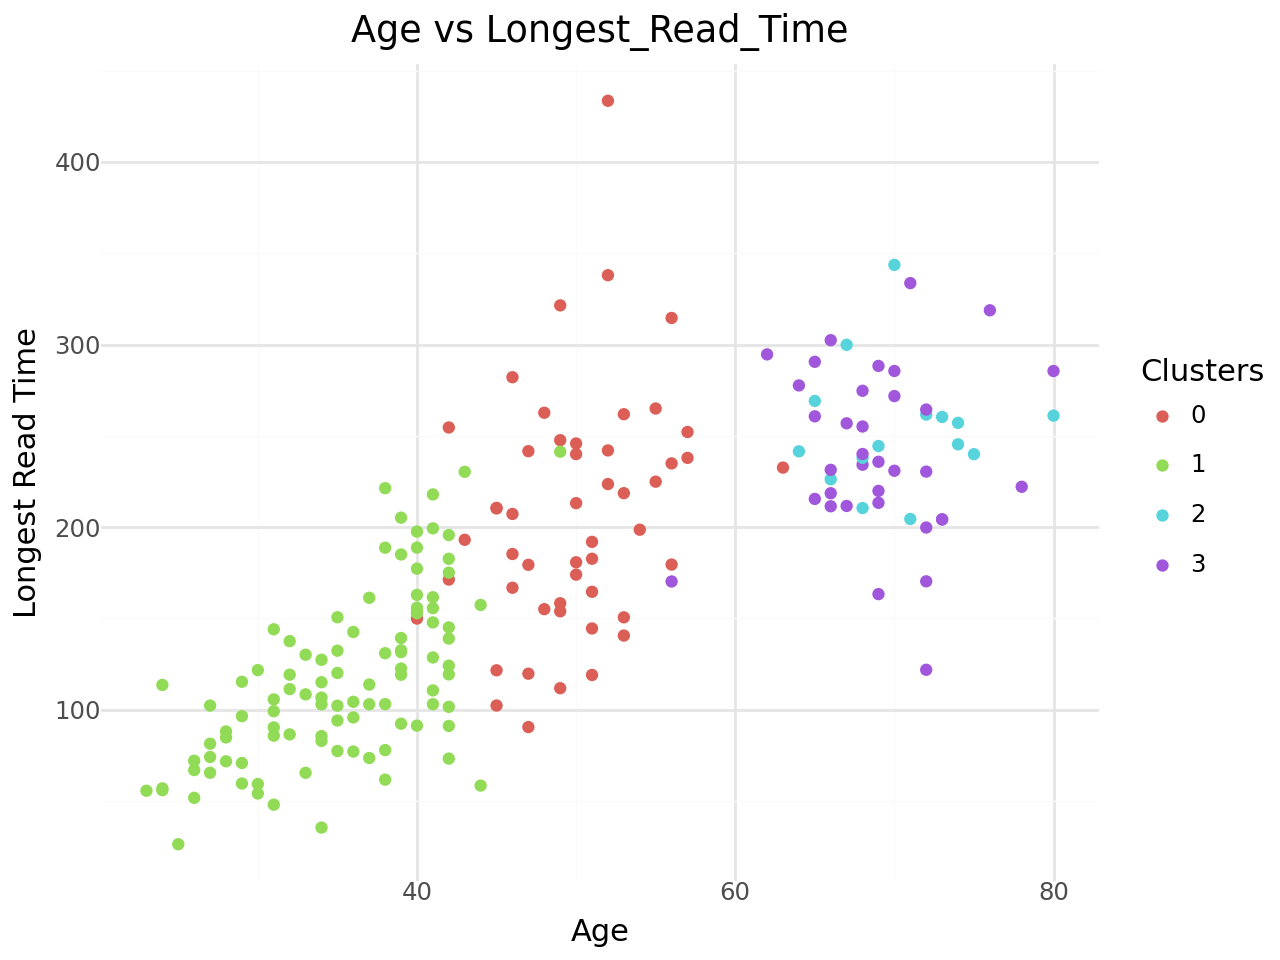

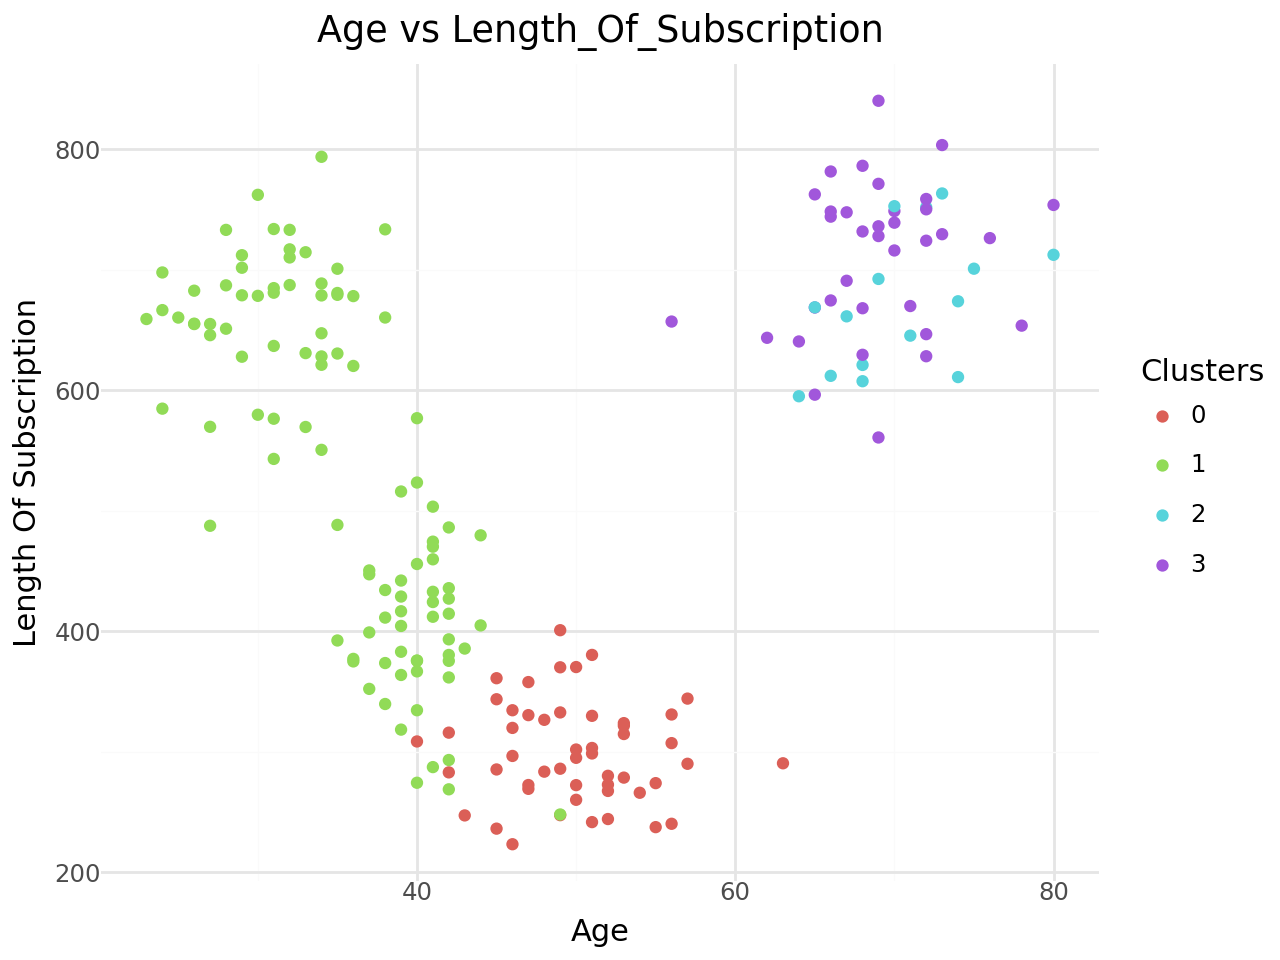

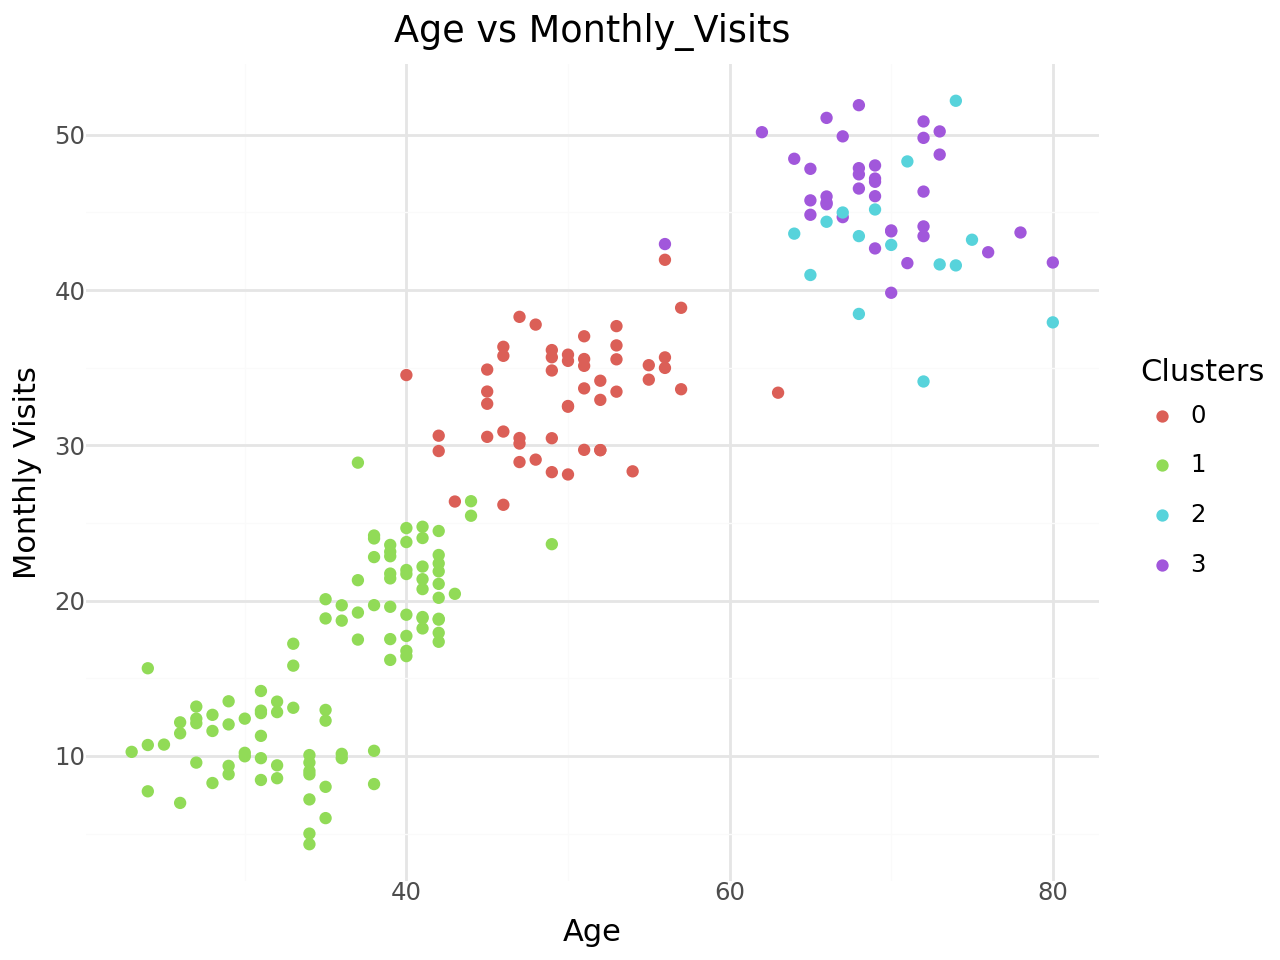

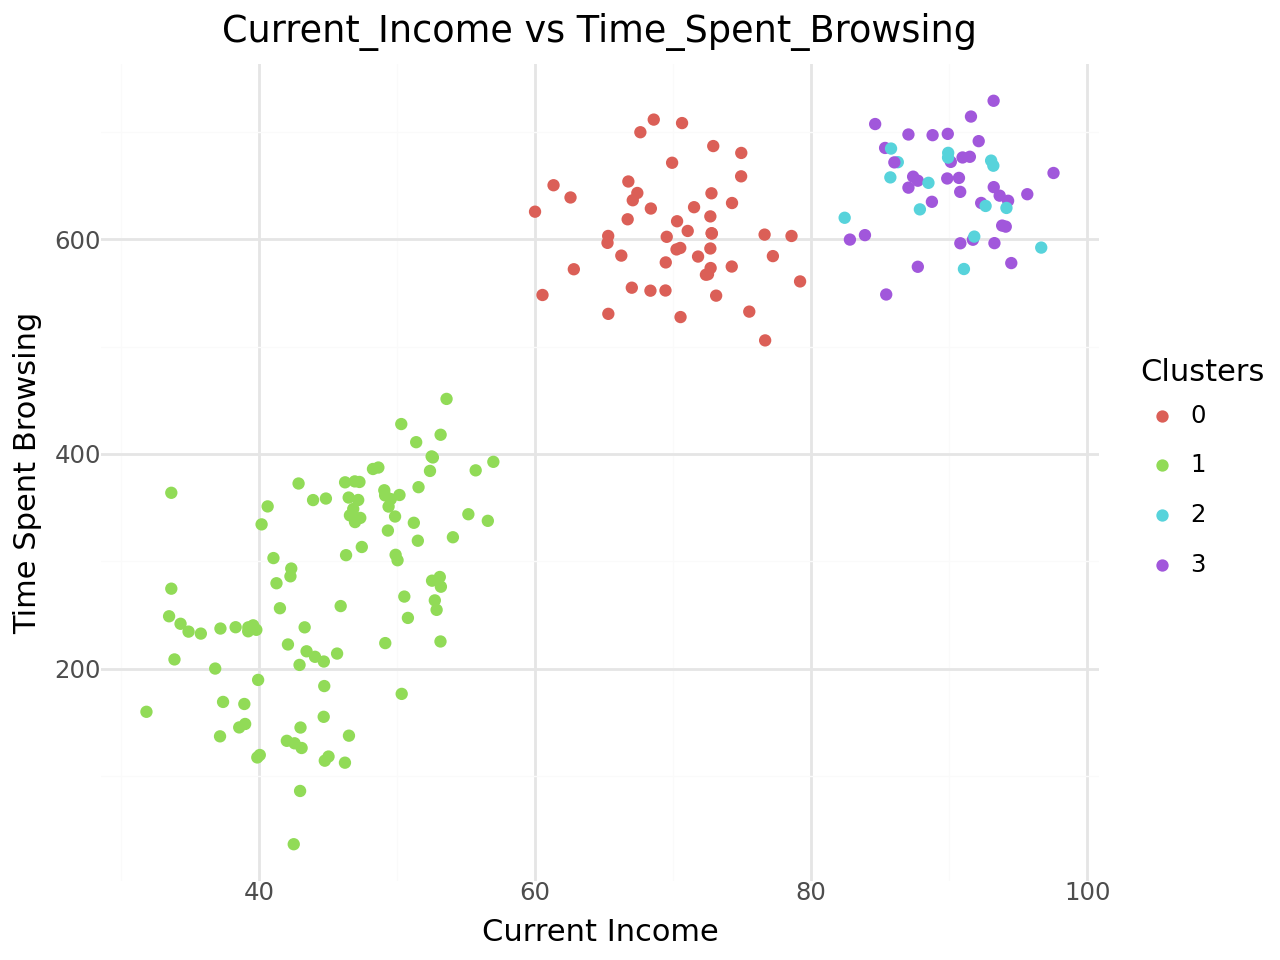

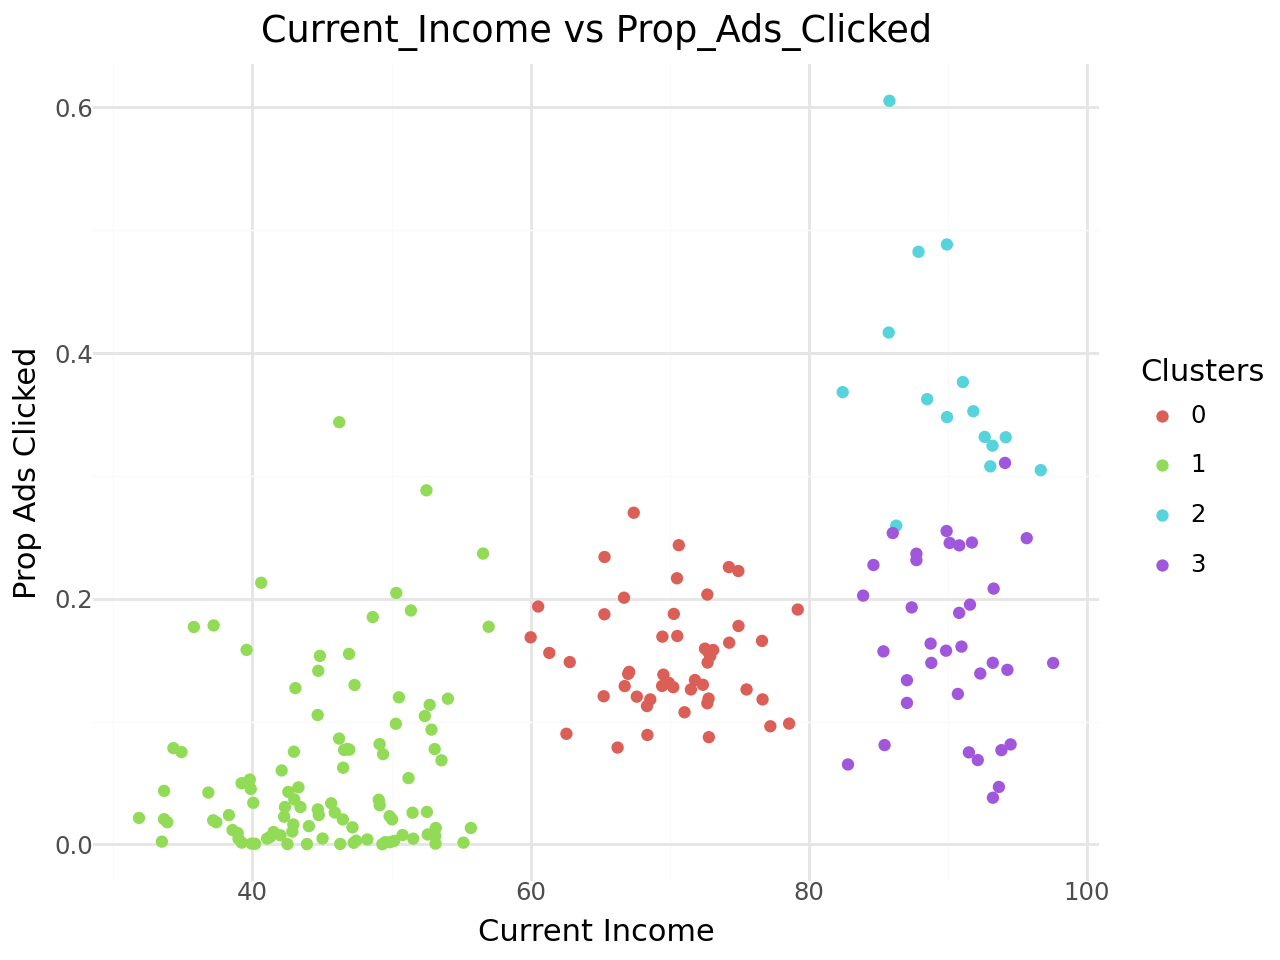

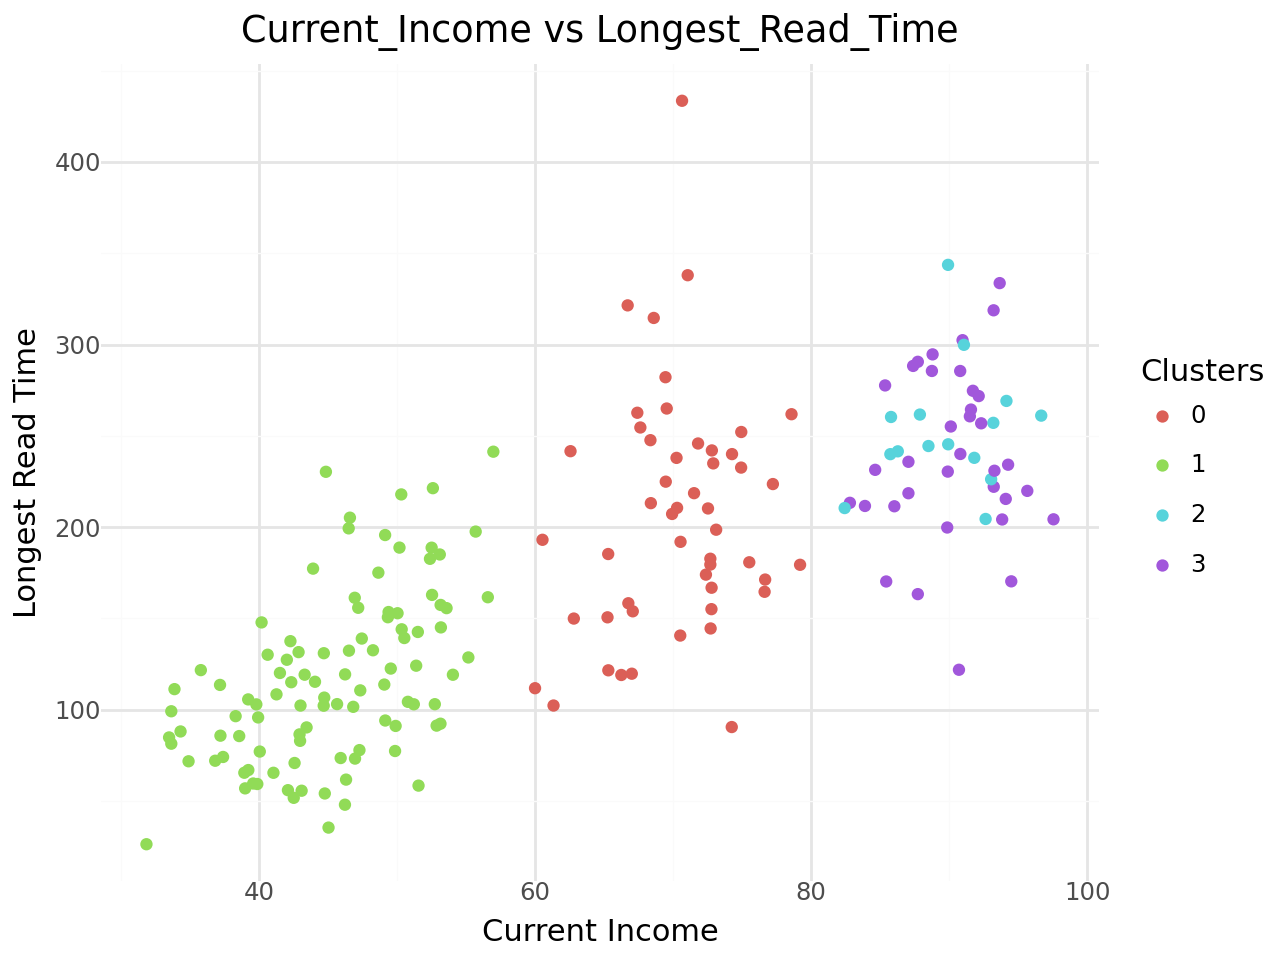

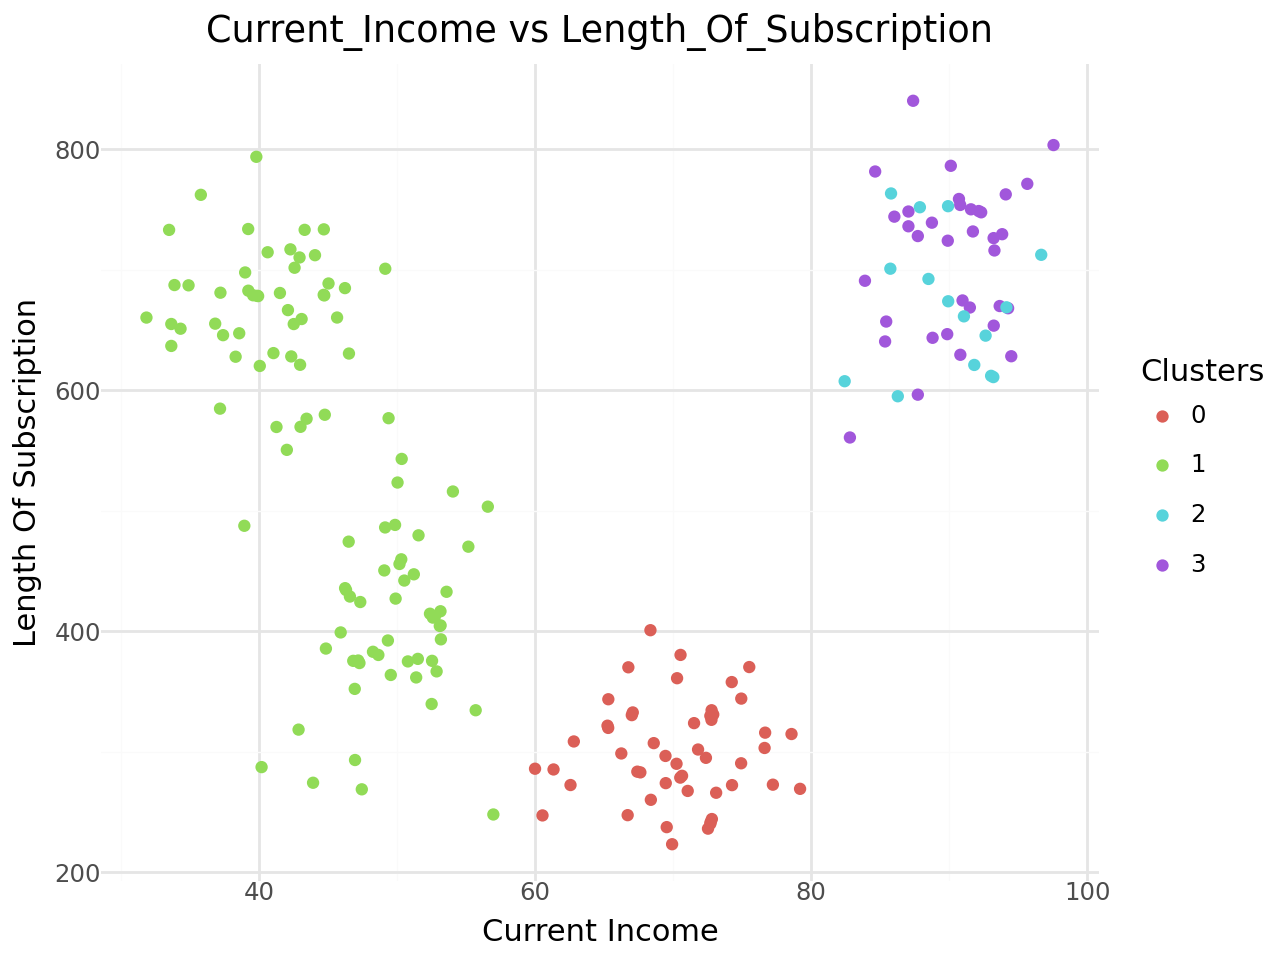

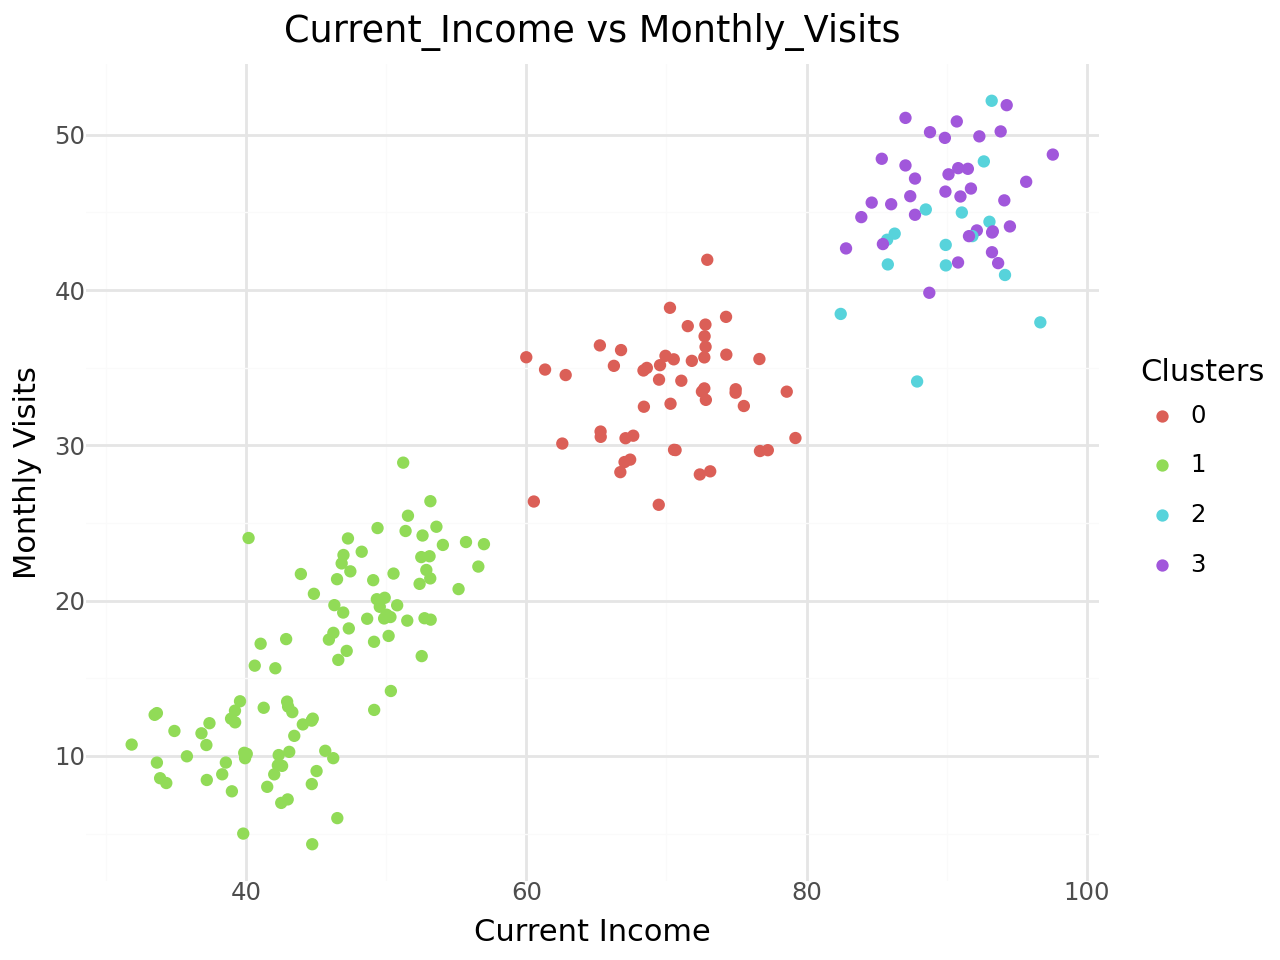

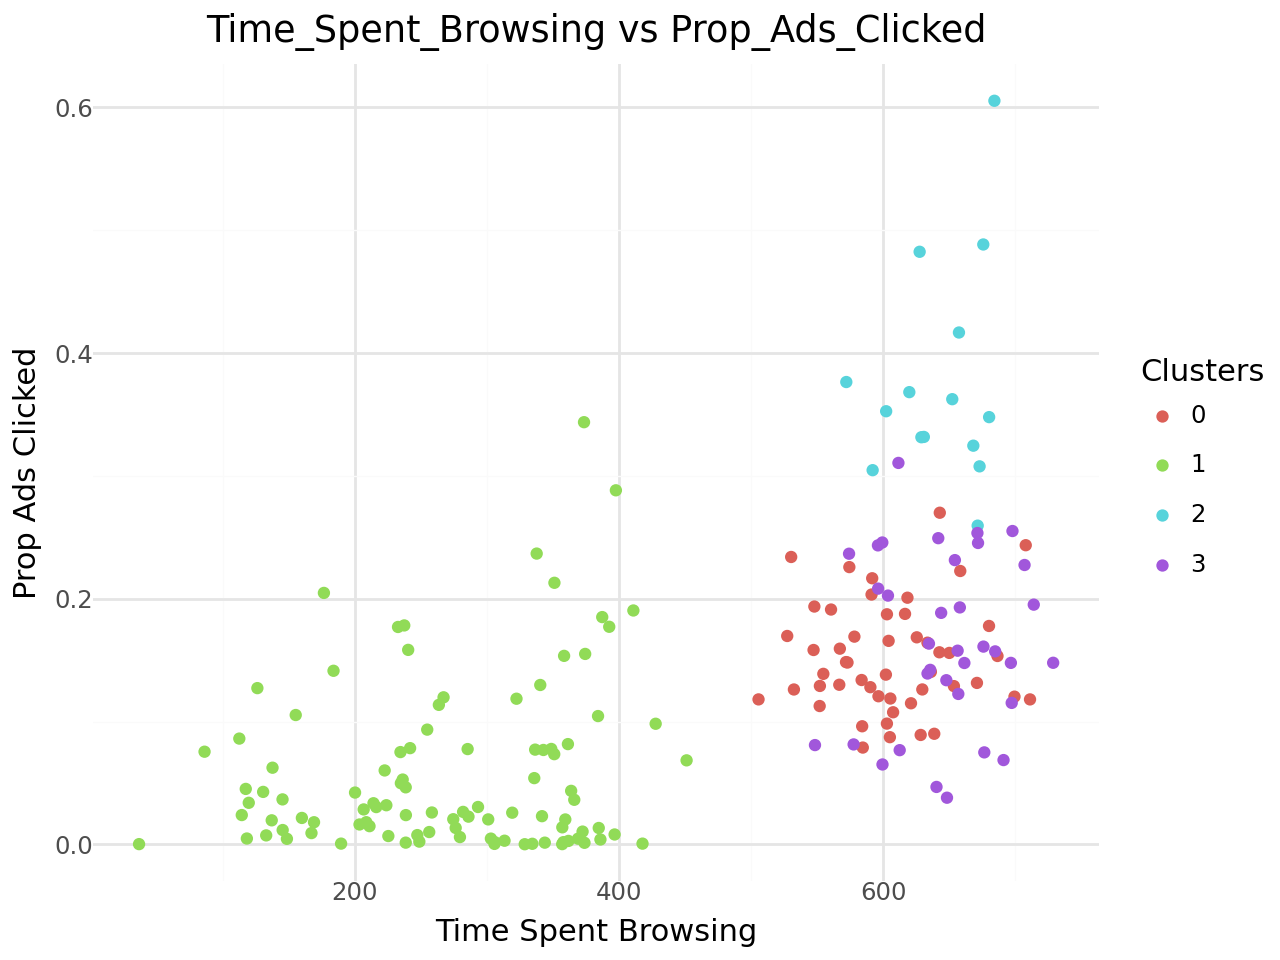

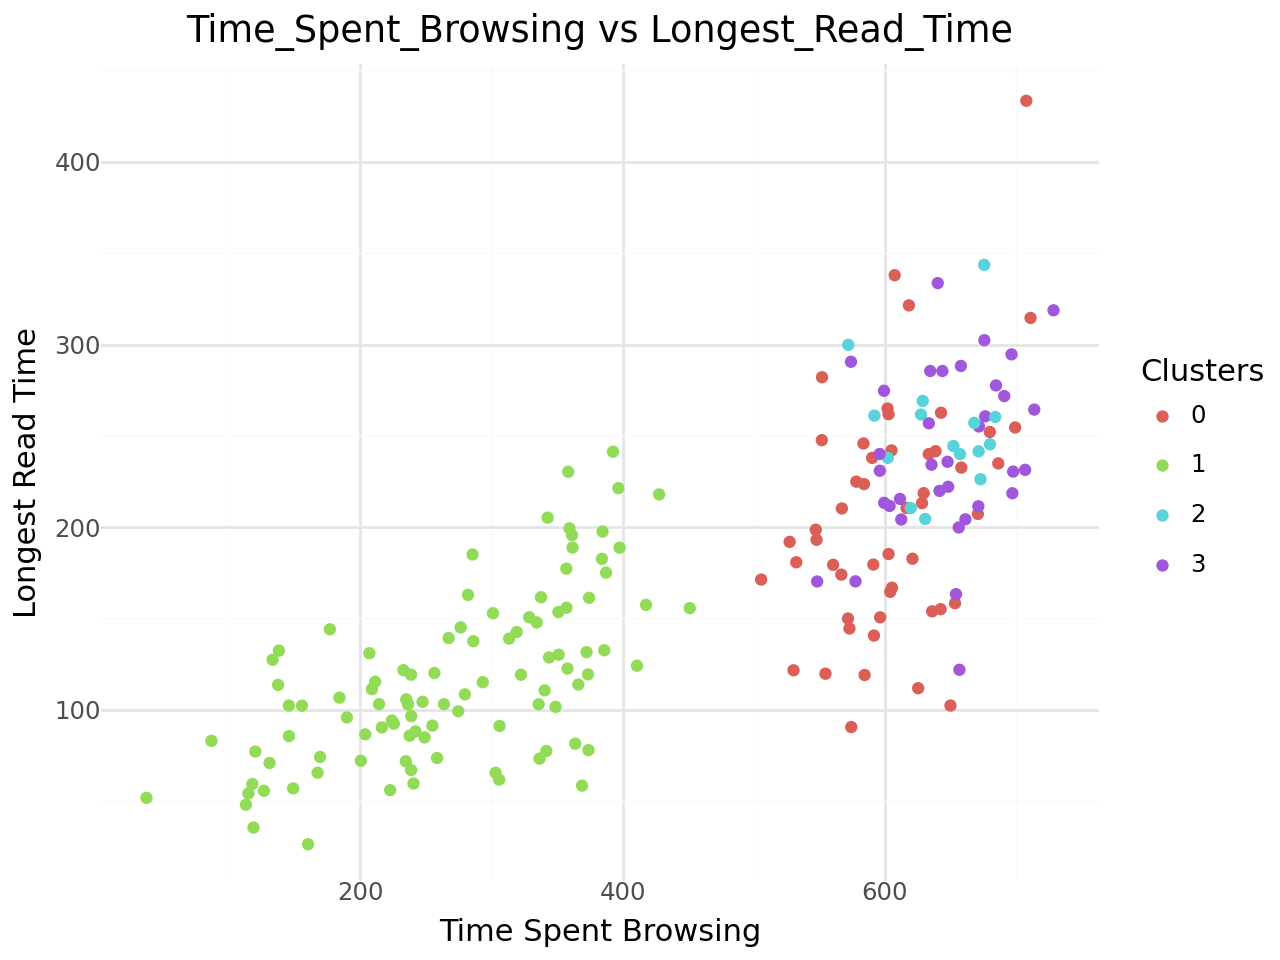

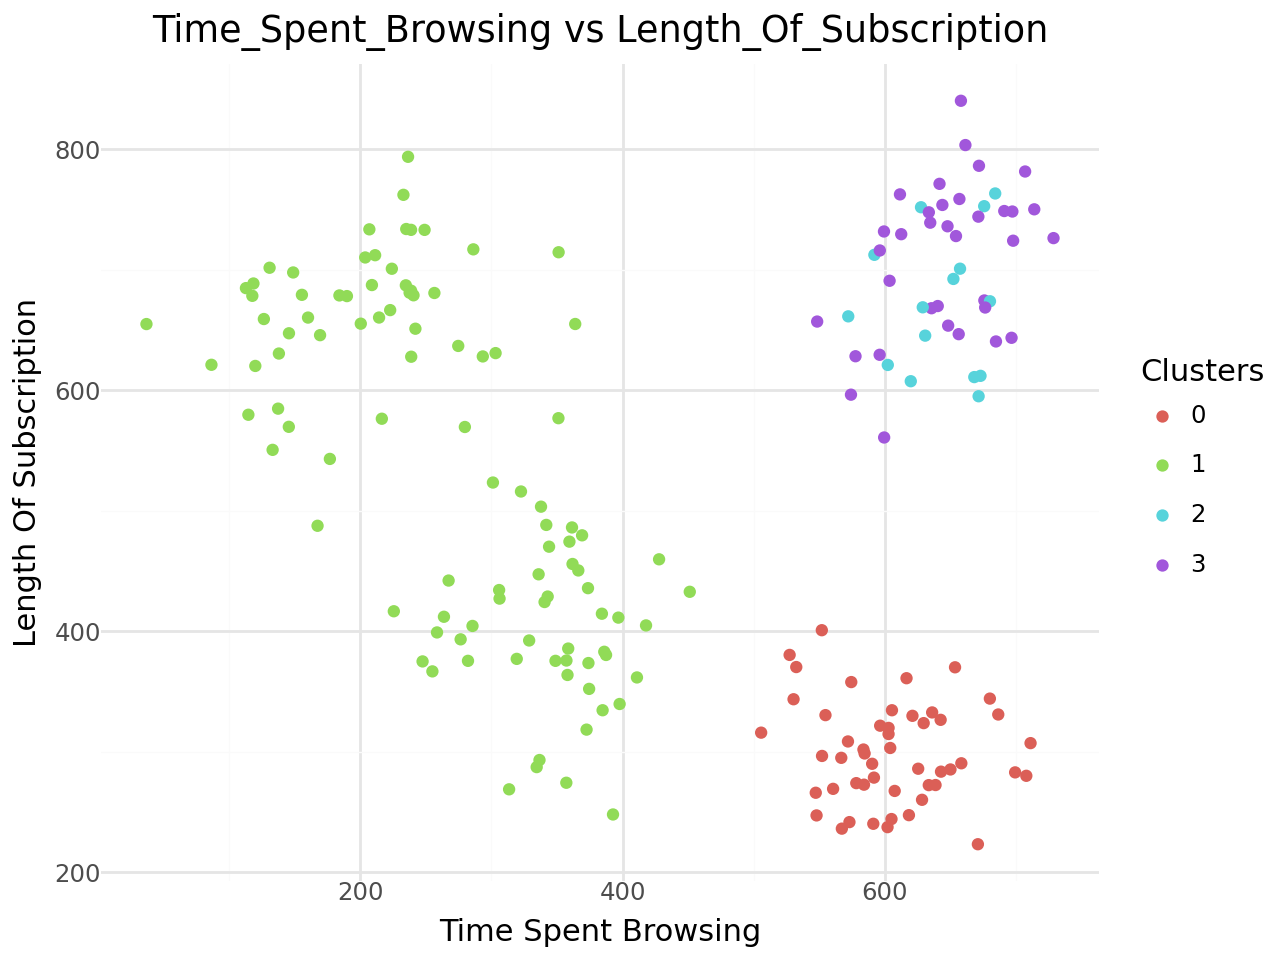

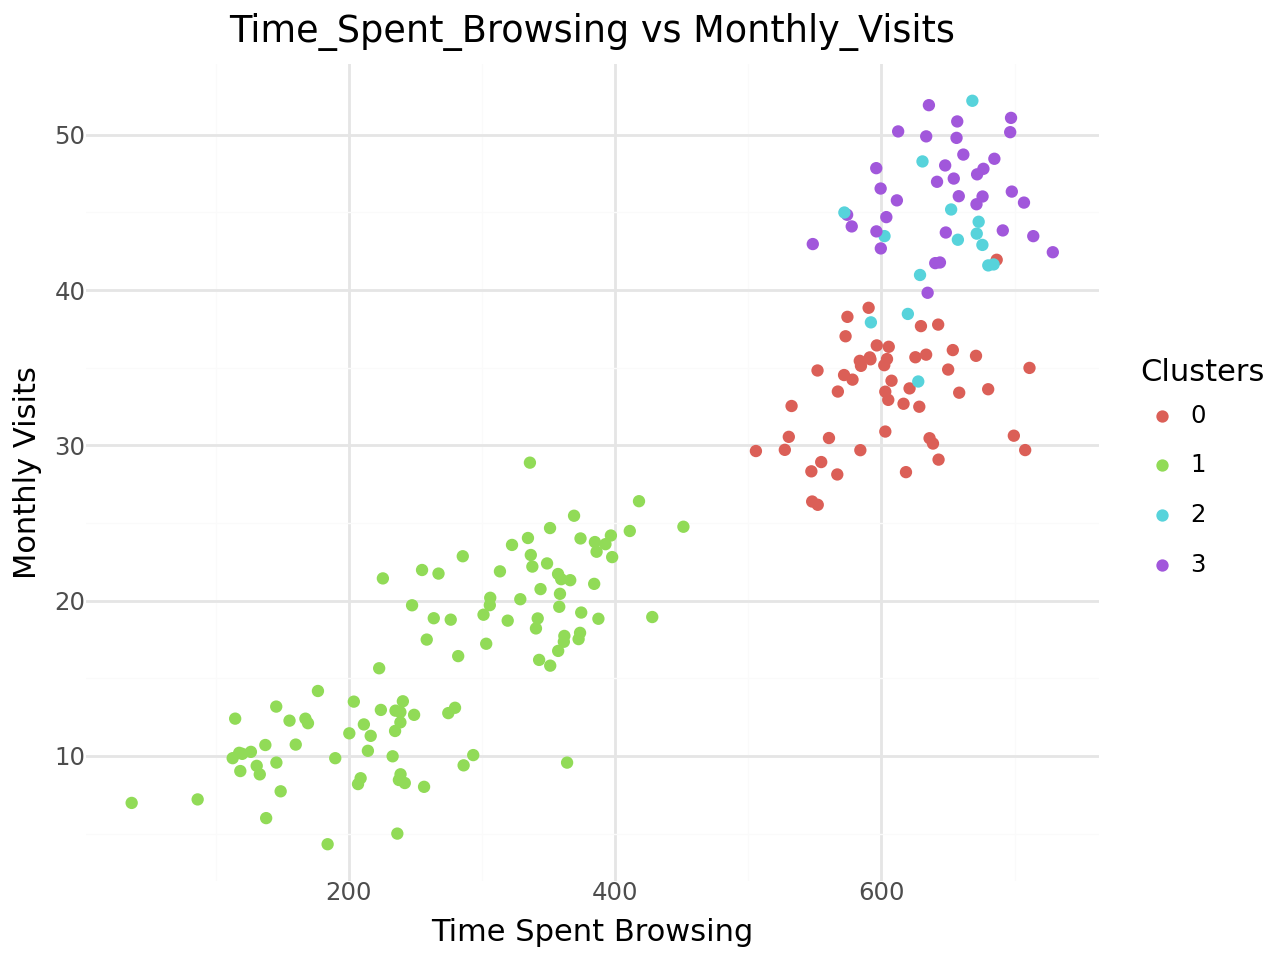

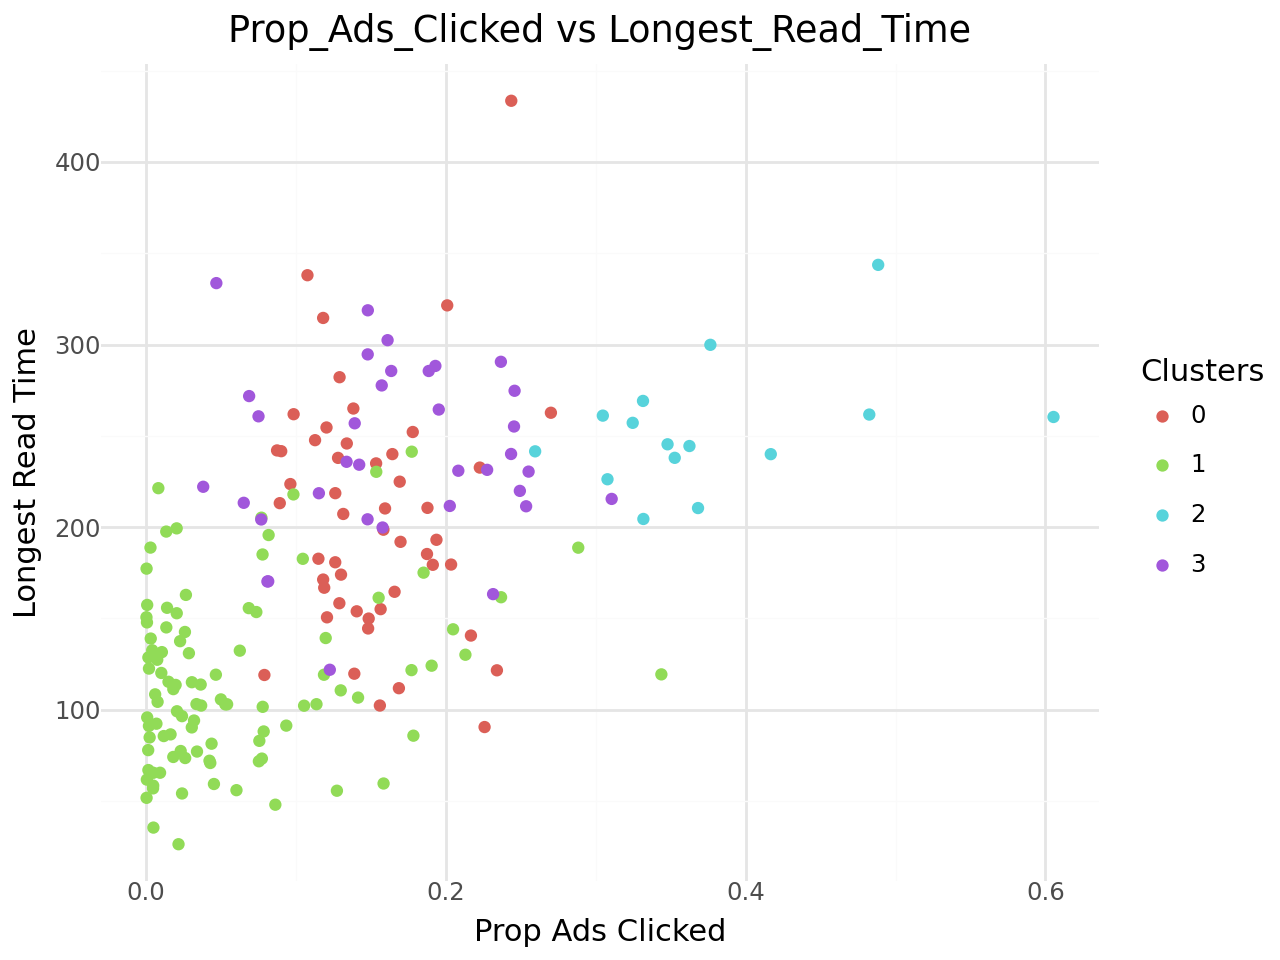

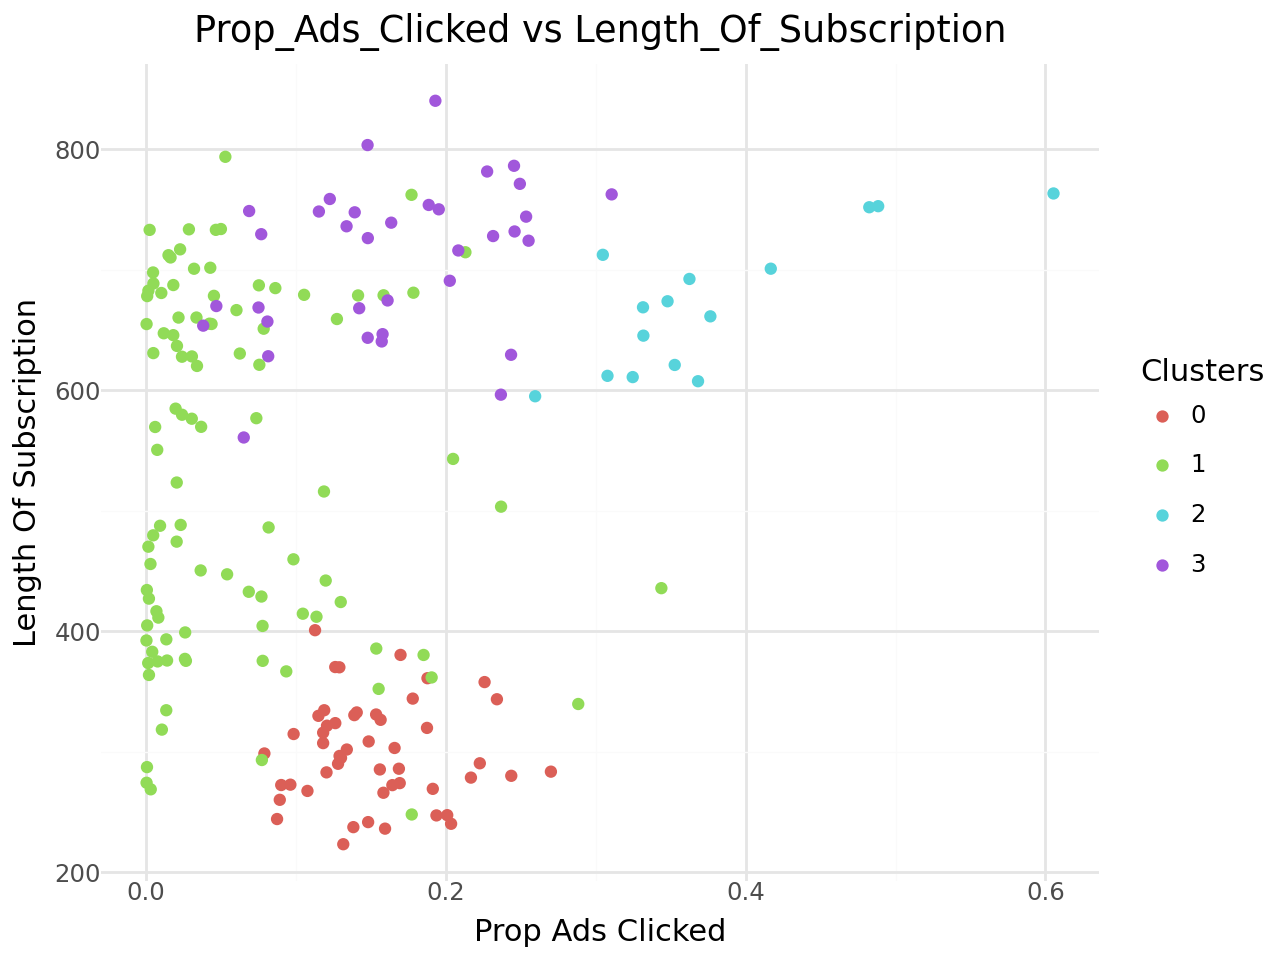

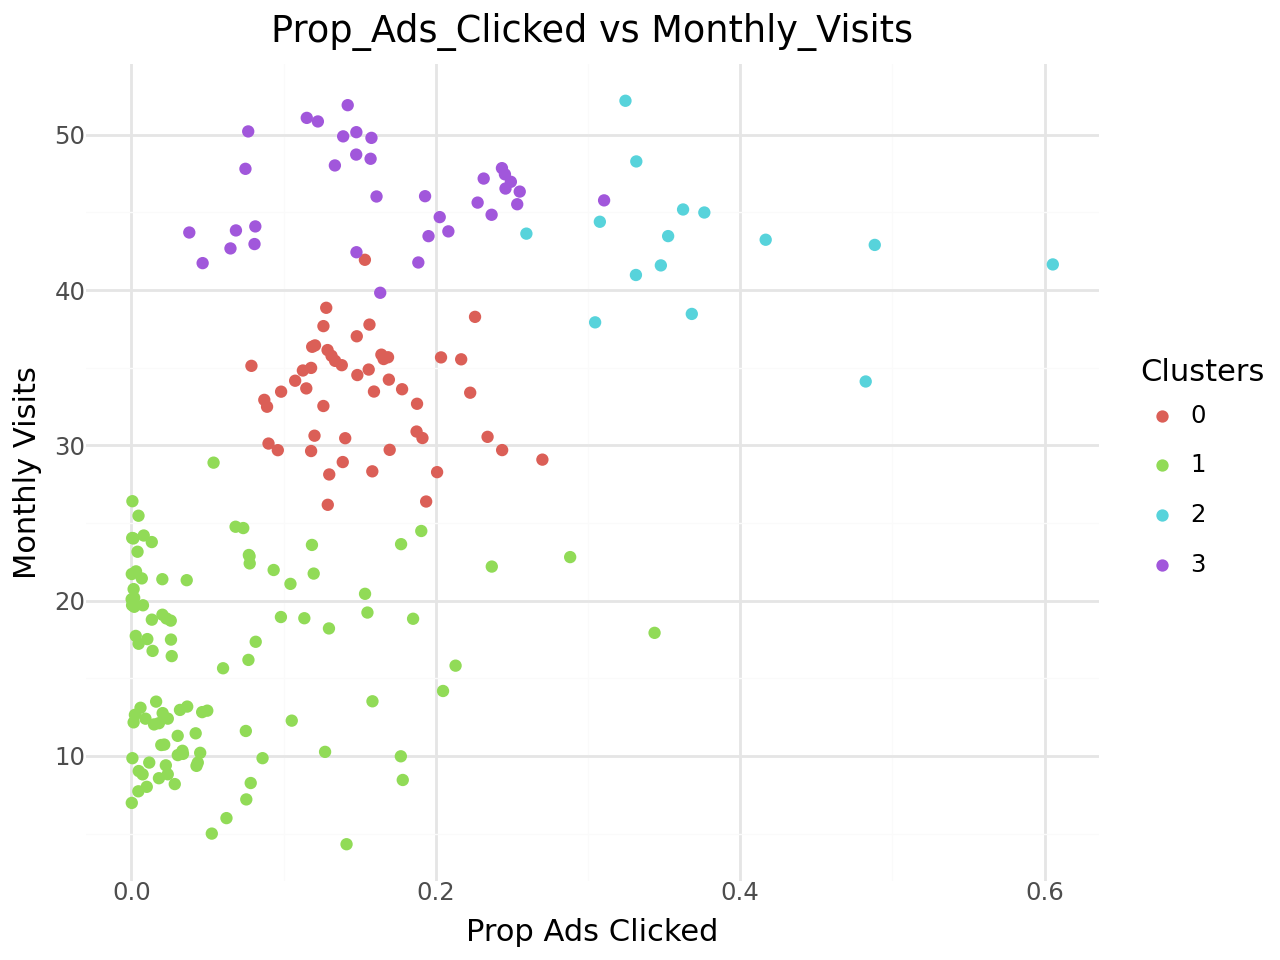

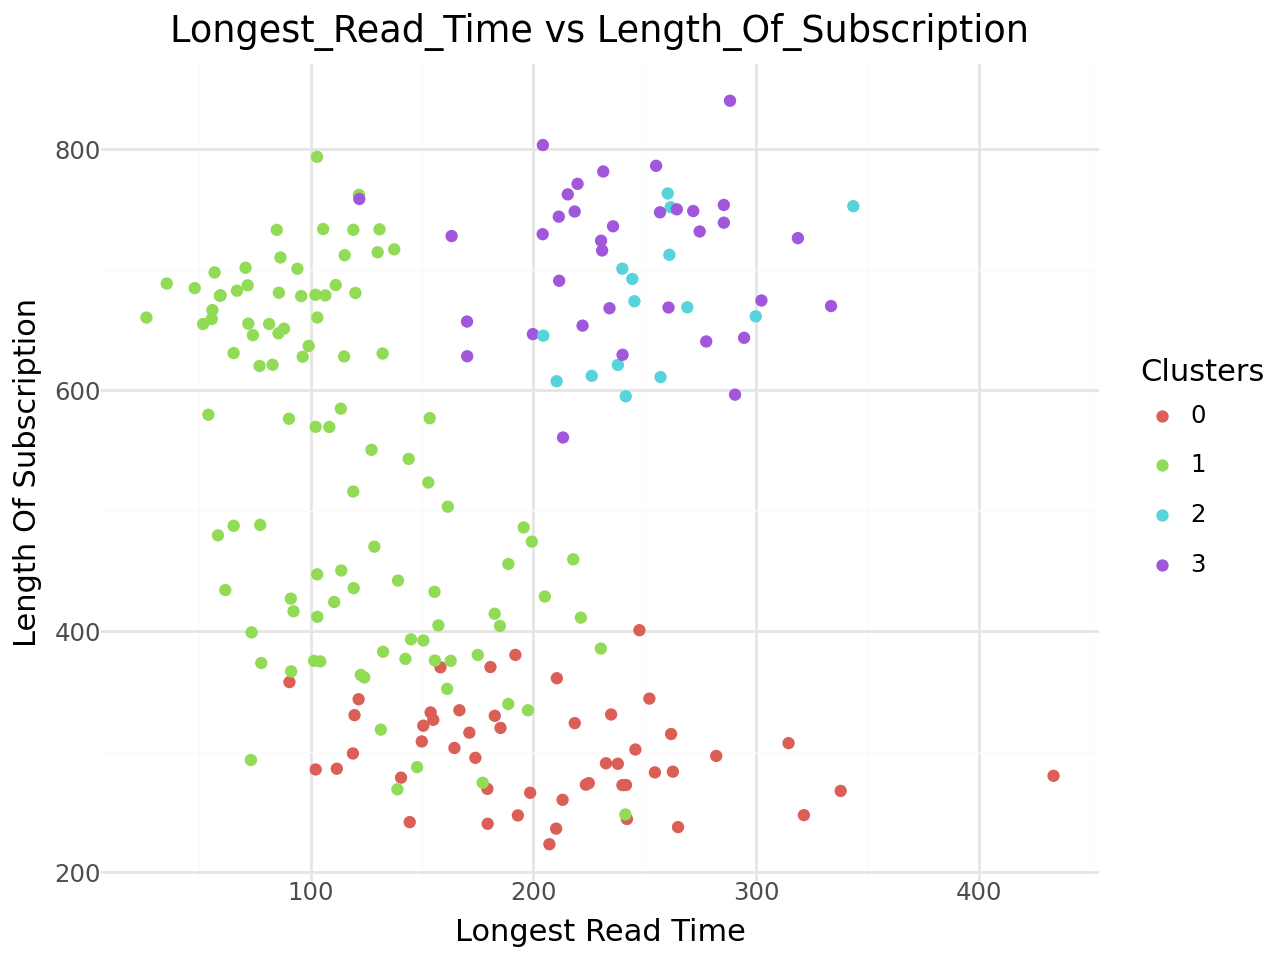

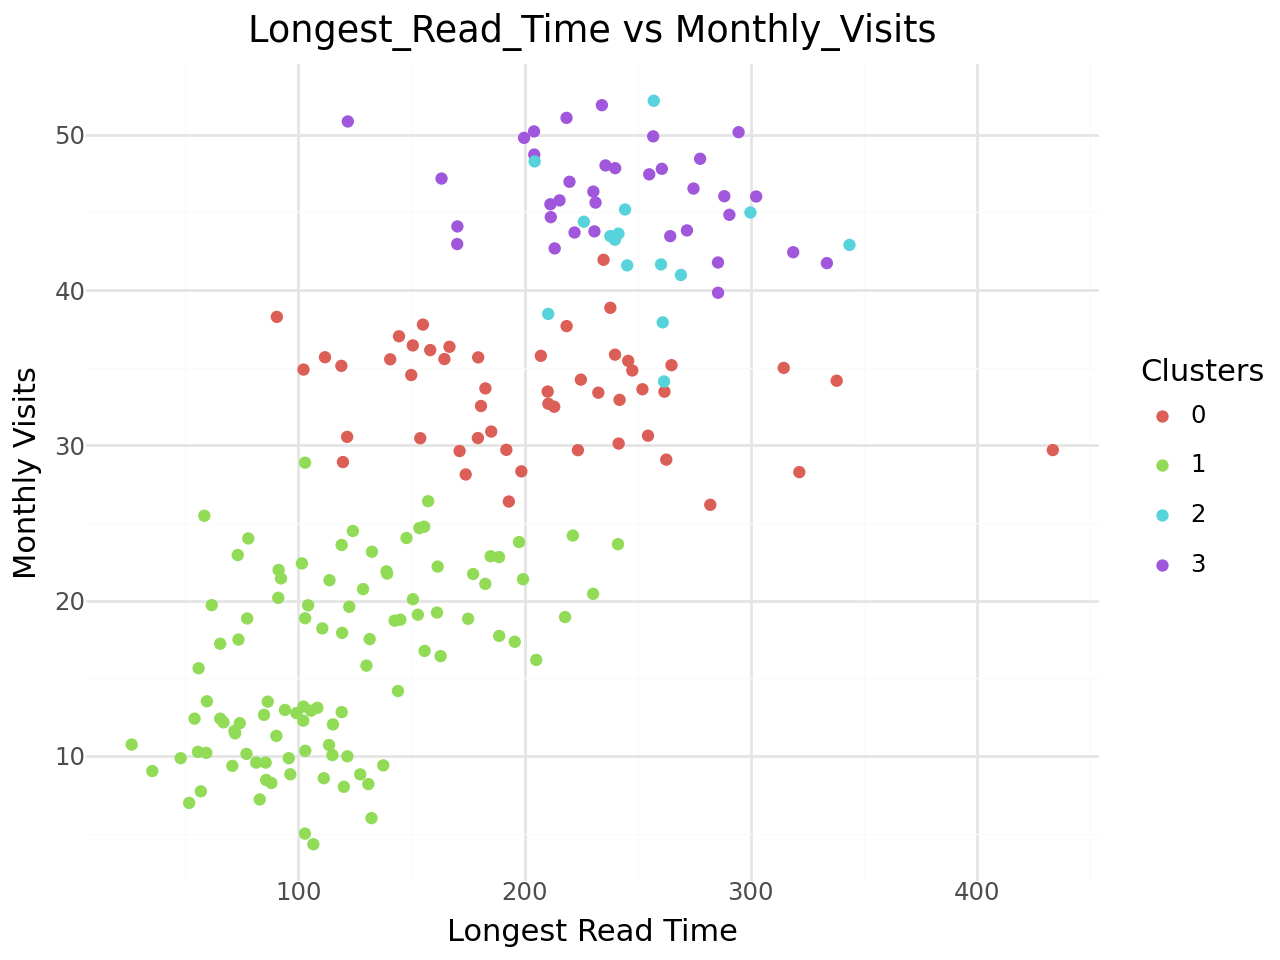

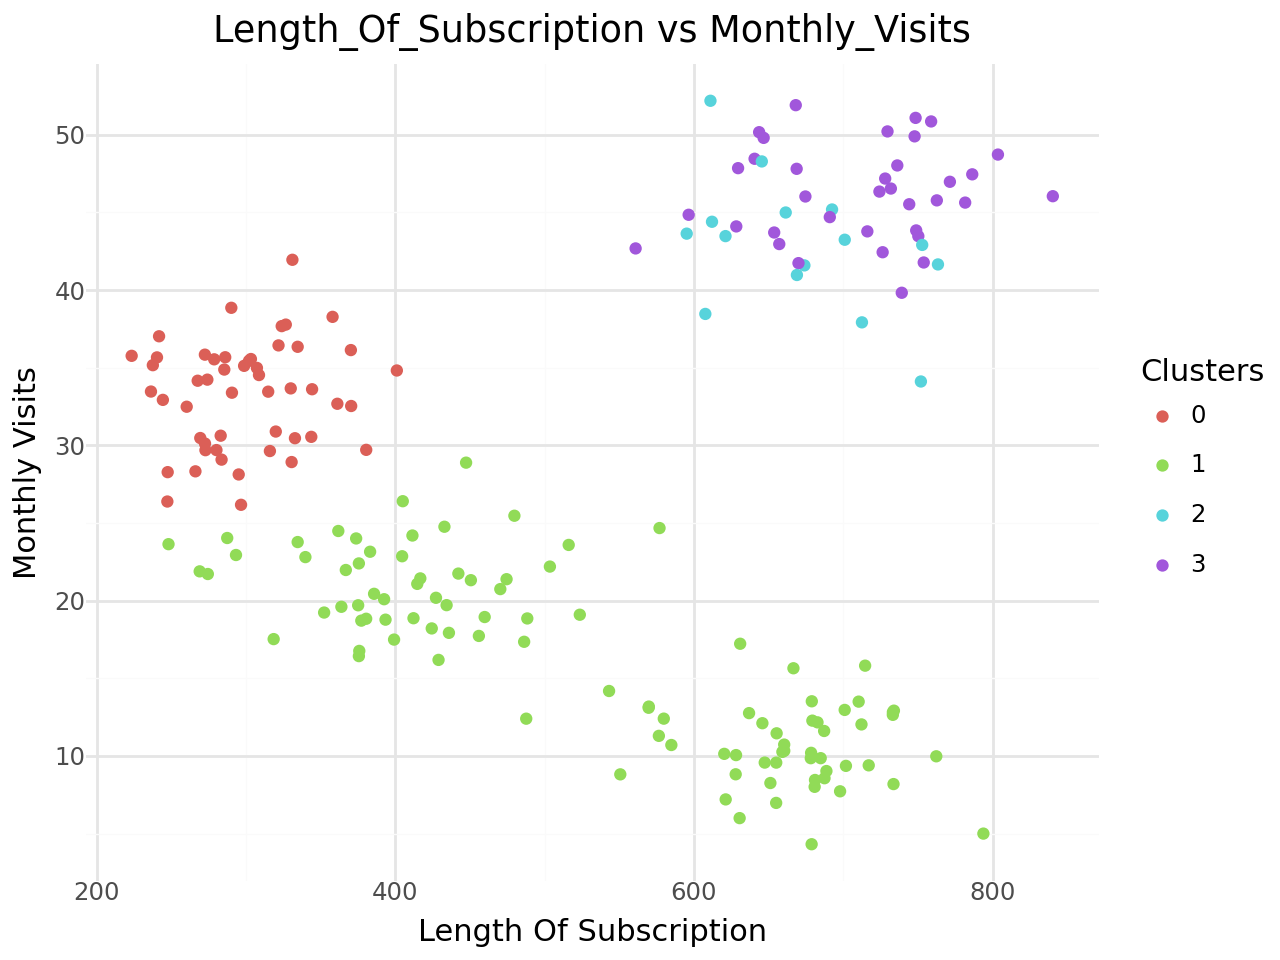

In [2]:
#load data with only continuous/interval variables

behavioral = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/refs/heads/main/data/HW3_behavioral.csv")
behavioral.head()

#check for missing values
behavioral.isnull().sum() #no missing values; no dropping values

#predictors & standardizing
predictors = ["age", "current_income", "time_spent_browsing", "prop_ads_clicked", "longest_read_time", "length_of_subscription", "monthly_visits"]

X = behavioral[predictors]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#create empty model
gmm = GaussianMixture(n_components=4)

#fit model + predict
labels = gmm.fit_predict(X_scaled)

#add cluster labels to the original DataFrame
behavioral["clusters"] = labels

#scatterplots of predictors; for each combination of predictors
combos = list(combinations(predictors, 2)) #generate all pairs of combinations

# Plot each pair of predictors
plots = []
for x, y in combos:
    plot = (
        ggplot(behavioral, aes(x=x, y=y, color="factor(clusters)")) +
        geom_point() +
        theme_minimal() +
        labs(
            x=x.replace("_", " ").title(),
            y=y.replace("_", " ").title(),
            title=f"{x.title()} vs {y.title()}",
            color="Clusters"
        )
    )
    plots.append(plot)

for plot in plots:  #display the plots
    display(plot)


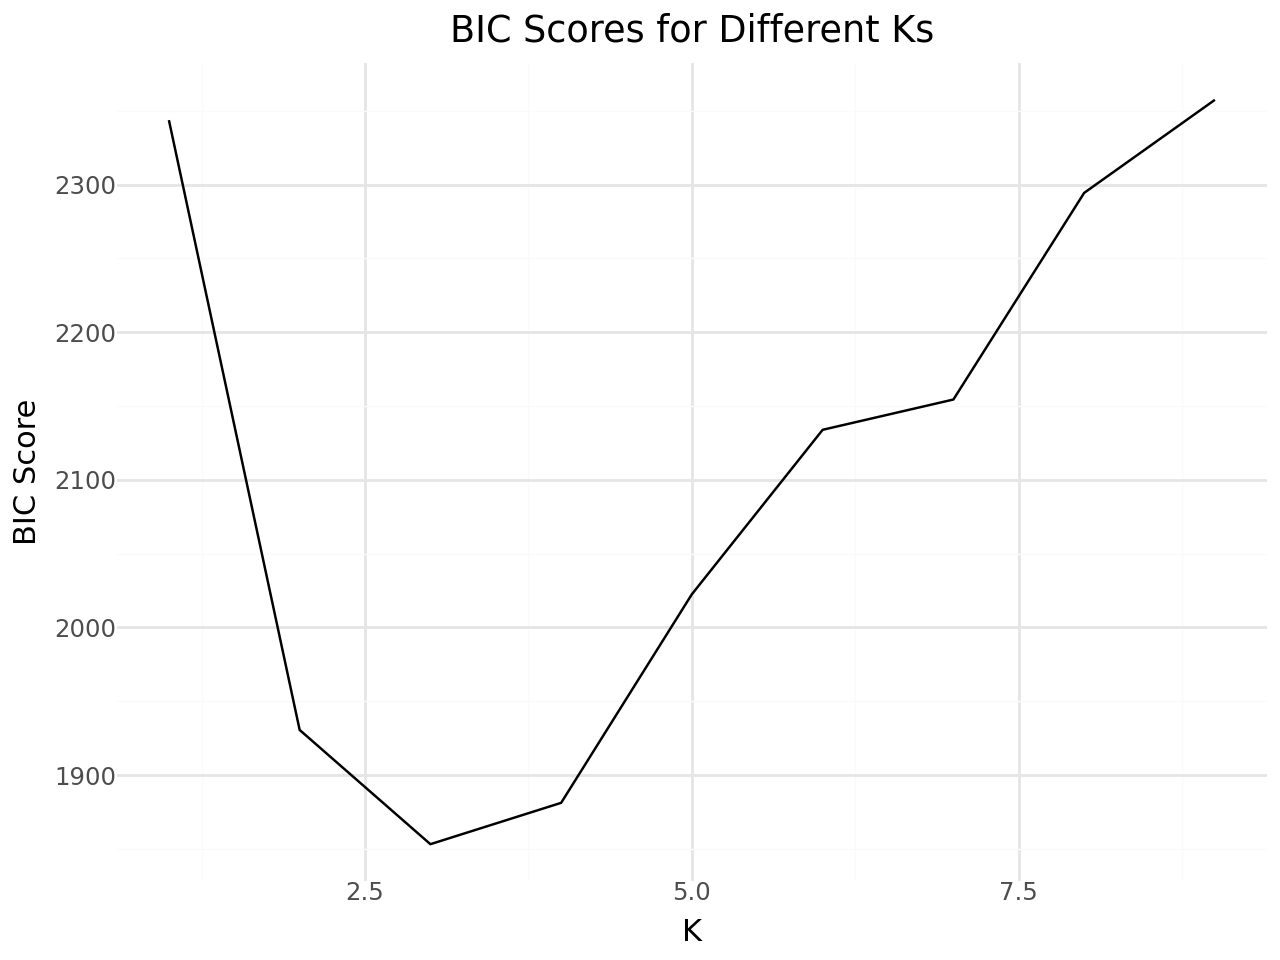

In [3]:
#use BIC to determine number of clusters to be used

# create dictionary
metrics = {"bic": [], "k": []}
#test ranges in GMM
for i in range(1,10):
    gmm = GaussianMixture(i)
    labels = gmm.fit_predict(X_scaled)
    bic_score = gmm.bic(X_scaled)

    metrics["bic"].append(bic_score)
    metrics["k"].append(i)

df = pd.DataFrame(metrics)

(ggplot(df, aes(x = "k", y = "bic")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "BIC Score",
         title = "BIC Scores for Different Ks"))


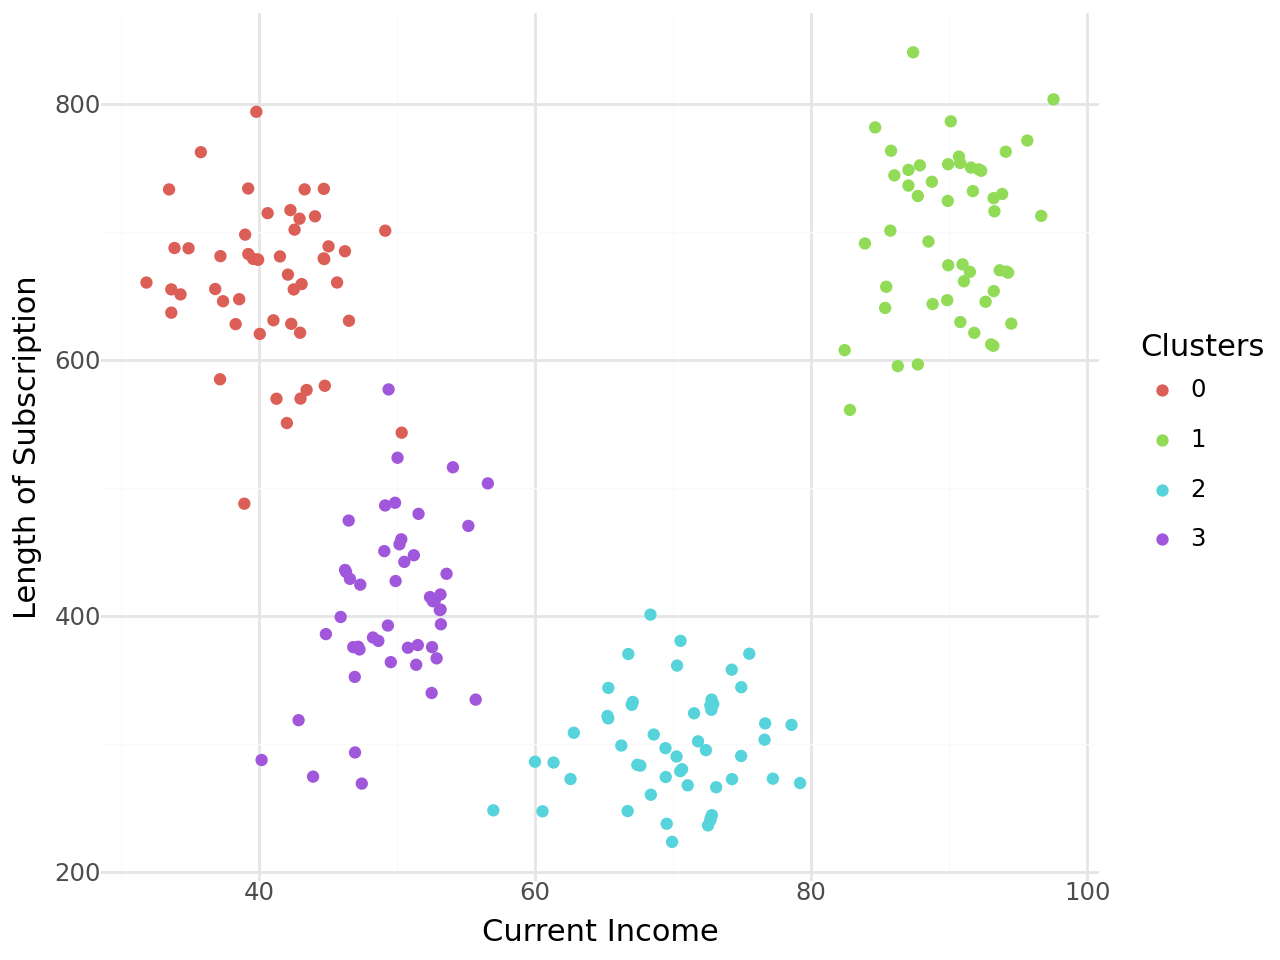

In [4]:
#create empty model - GMM
gmm = GaussianMixture(n_components=4)

#fit model + predict
labels = gmm.fit_predict(X_scaled)

#add cluster labels to the original DataFrame
X["clusters"] = labels

#plot results
(
    ggplot(X, aes(x="current_income", y="length_of_subscription", color="factor(clusters)")) +
    geom_point() +
    theme_minimal() +
    labs(
        x="Current Income",
        y="Length of Subscription",
        color="Clusters"
    )
)

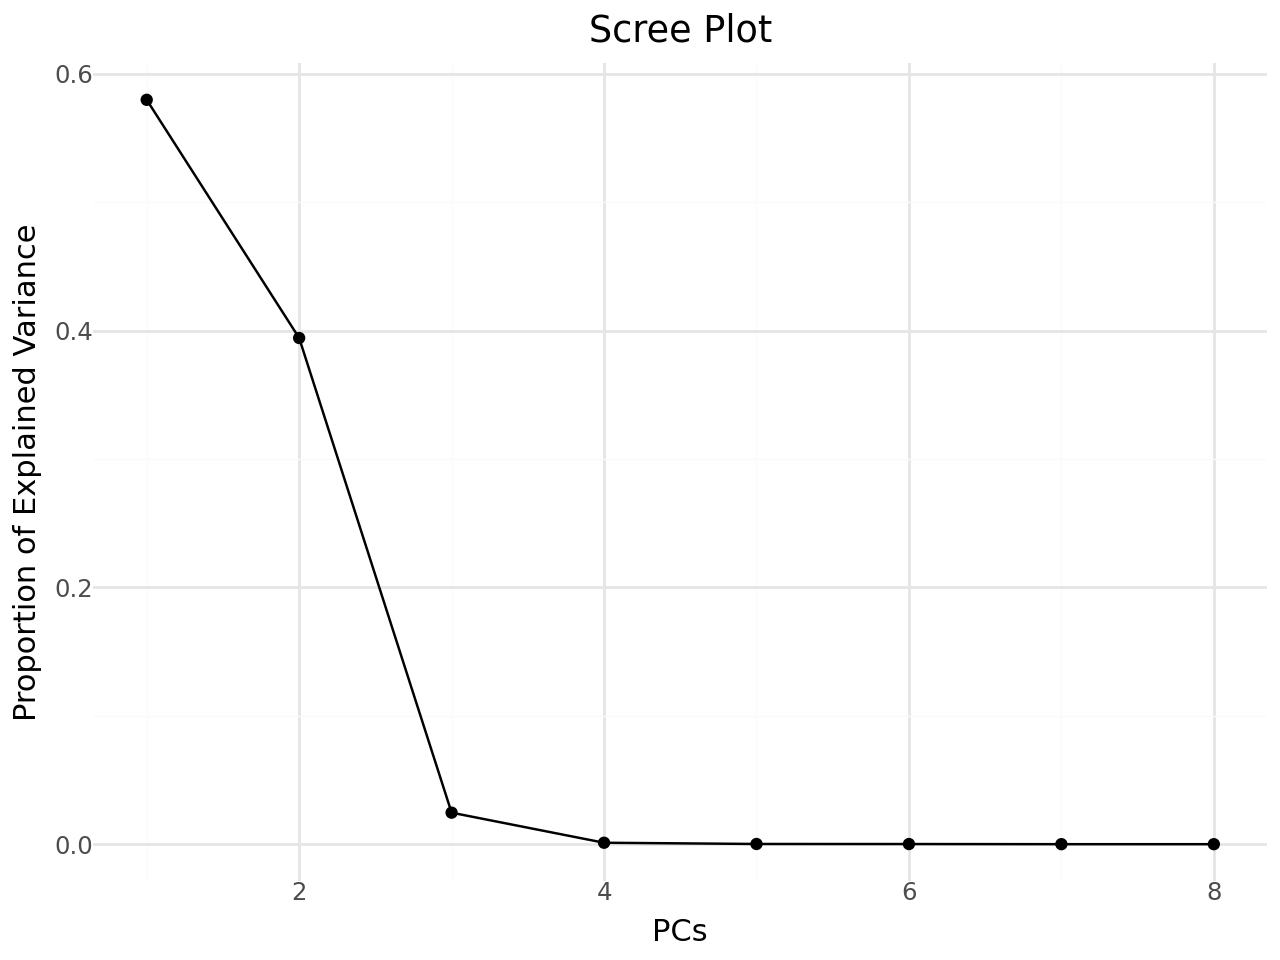

In [5]:
#pca
pca = PCA()
pca.fit(X)

#scree plot
pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1,len(pca.explained_variance_ratio_)+1),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})
#display
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() +
 theme_minimal() + labs(x = "PCs", y = "Proportion of Explained Variance", title = "Scree Plot"))


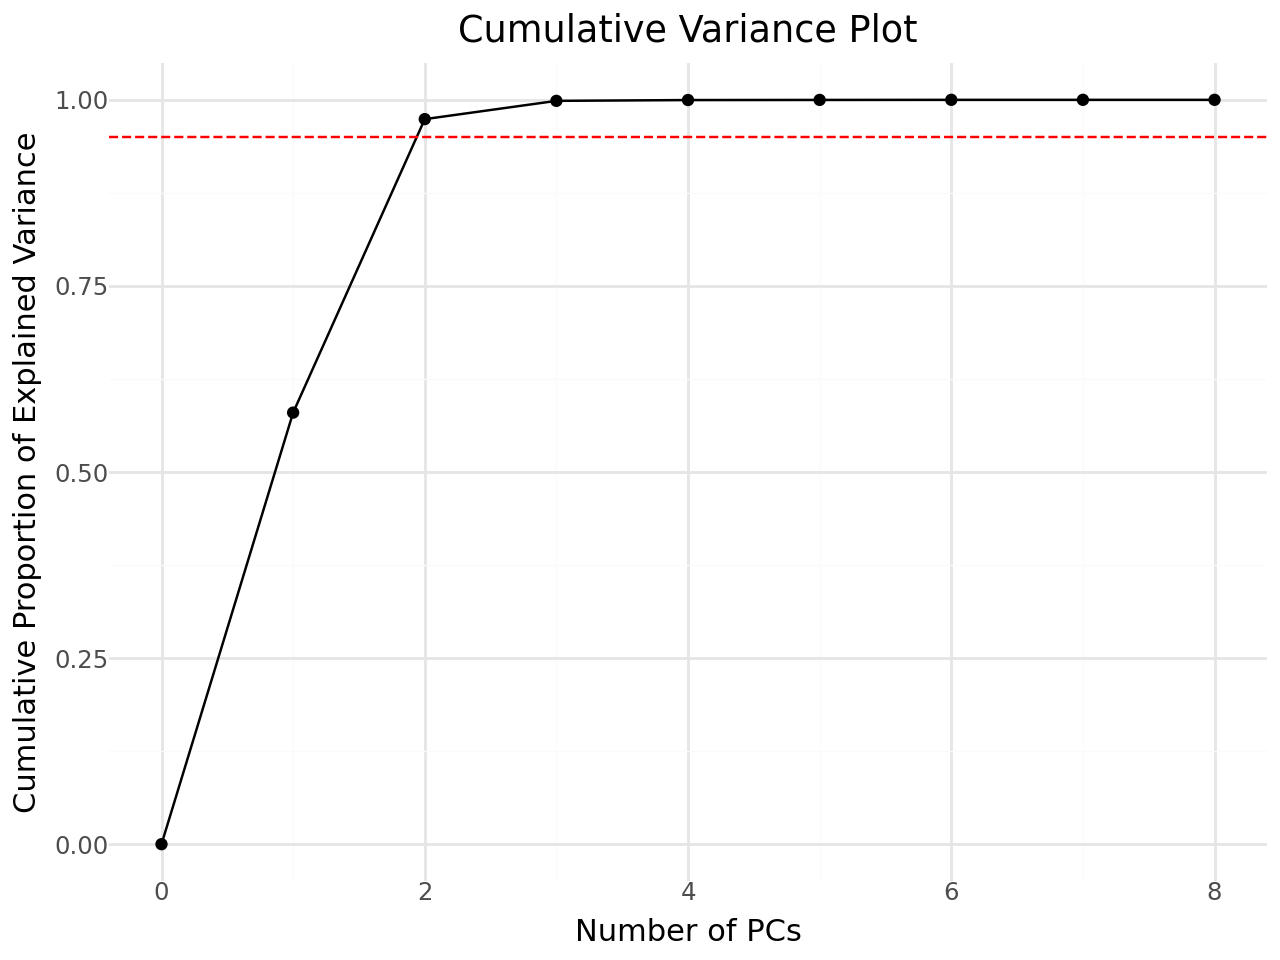

In [6]:

#cumulative variance
pcaDF2 = pd.concat([pcaDF, pd.DataFrame({"pc": [0], "cum_var": [0]})], ignore_index=True) # add 0,0 for reference

(ggplot(pcaDF2, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.95, color = "red", linetype = "dashed") +
 theme_minimal() + labs(x = "Number of PCs", y = "Cumulative Proportion of Explained Variance", title = "Cumulative Variance Plot"))

In [7]:
#summary of what kind of customers are in each cluster (using summary table)
cluster_summary = behavioral.groupby('clusters')[predictors].agg(['mean','std','median','min','max'])
cluster_summary

age                          current_income                   \
               mean       std median min max           mean       std median   
clusters                                                                       
0         49.880000  4.488716   50.0  40  63      70.240200  4.531781  70.53   
1         35.370000  5.695391   36.0  23  49      45.300600  6.003268  45.79   
2         70.400000  4.339190   70.0  64  80      89.937333  3.839007  89.93   
3         68.942857  4.451985   69.0  56  80      90.240857  3.580378  90.80   

                        ... length_of_subscription                          \
            min    max  ...                   mean         std      median   
clusters                ...                                                  
0         60.00  79.20  ...             299.507200   41.507345  295.899361   
1         31.85  56.98  ...             532.675134  143.645889  533.348968   
2         82.43  96.67  ...             671.403067   56.670825  668.950295   
3         82.81  97.56  ...             710.267499   62.330689  728.063700   

                                 monthly_visits                       \
                 min         max           mean       std     median   
clusters                                                               
0         223.423411  401.017435      33.263248  3.440663  33.639702   
1         248.108717  793.832506      15.876001  5.906965  16.307184   
2         595.141761  763.412996      42.866101  4.282570  43.238983   
3         560.927796  840.325948      46.230638  3.027729  46.042560   

                                
                min        max  
clusters                        
0         26.171921  41.948066  
1          4.316451  28.885762  
2         34.111695  52.186826  
3         39.824416  51.903795  

[4 rows x 35 columns]

**ARTICLE CLUSTERING**

In [8]:
#load data

article = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/refs/heads/main/data/HW3_topics.csv")
article.head()

#check for missing values

article.isnull().sum() #no missing values; no dropping values

#set up X/features

features = ["Stocks", "Productivity", "Fashion", "Celebrity", "Cryptocurrency", "Science", "Technology", "SelfHelp", "Fitness", "AI"] #no id
X = article[features]

#hac
hac = AgglomerativeClustering(linkage = "average",
                              metric = "cosine",
                              distance_threshold=0,
                              n_clusters = None)

#fit and get labels
labels = hac.fit_predict(X[features])

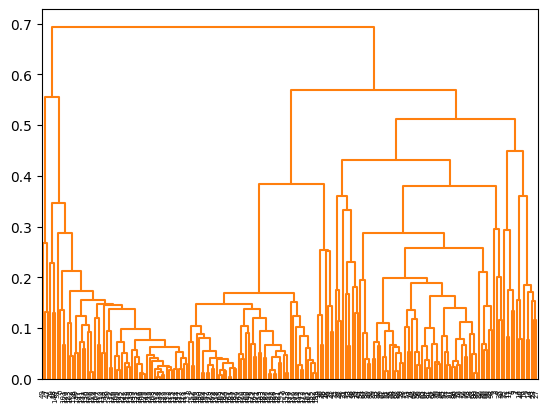

In [9]:
#plot dendrogram to figure out number of clusters

#function for dendrogram from sklearn
# from sklearn: https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
def plot_dendrogram(hac, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(hac.children_.shape[0])
    n_samples = len(hac.labels_)
    for i, merge in enumerate(hac.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [hac.children_, hac.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

#call function using article hac
plot_dendrogram(hac, color_threshold = 5)

In [10]:
#refit hac with specific number of clusters
hac = AgglomerativeClustering(linkage = "average",
                              metric = "cosine",
                              n_clusters = 3)

#fit and get labels
labels = hac.fit_predict(X[features])

#silhouette score
print(silhouette_score(X_scaled, labels))

#look at cluster performance
article["cluster_3"] = labels
gg_list = []
for test in features:
    title = "Test " + test.capitalize() + " Cluster Performance"
    gg_list.append(ggplot(article, aes(x = "factor(cluster_3)", y = test))
          + geom_boxplot(aes(fill = "factor(cluster_3)")) +
          theme_minimal() +
          scale_fill_discrete(name = "Cluster Assignment") +
          labs(x = "Cluster",
               y = "Score",
               title = title))

0.3166611891007902


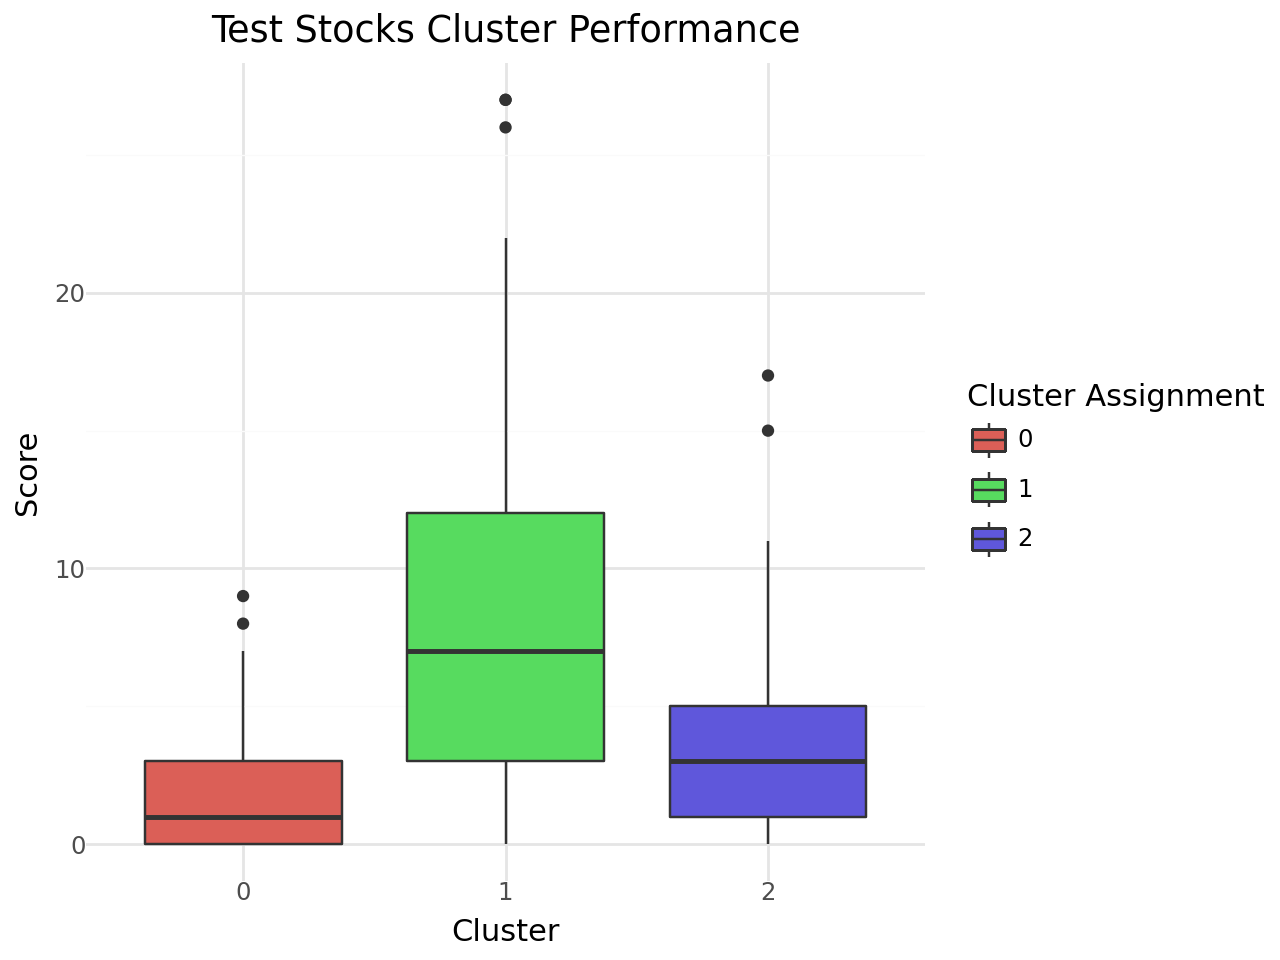

In [11]:
gg_list[0]

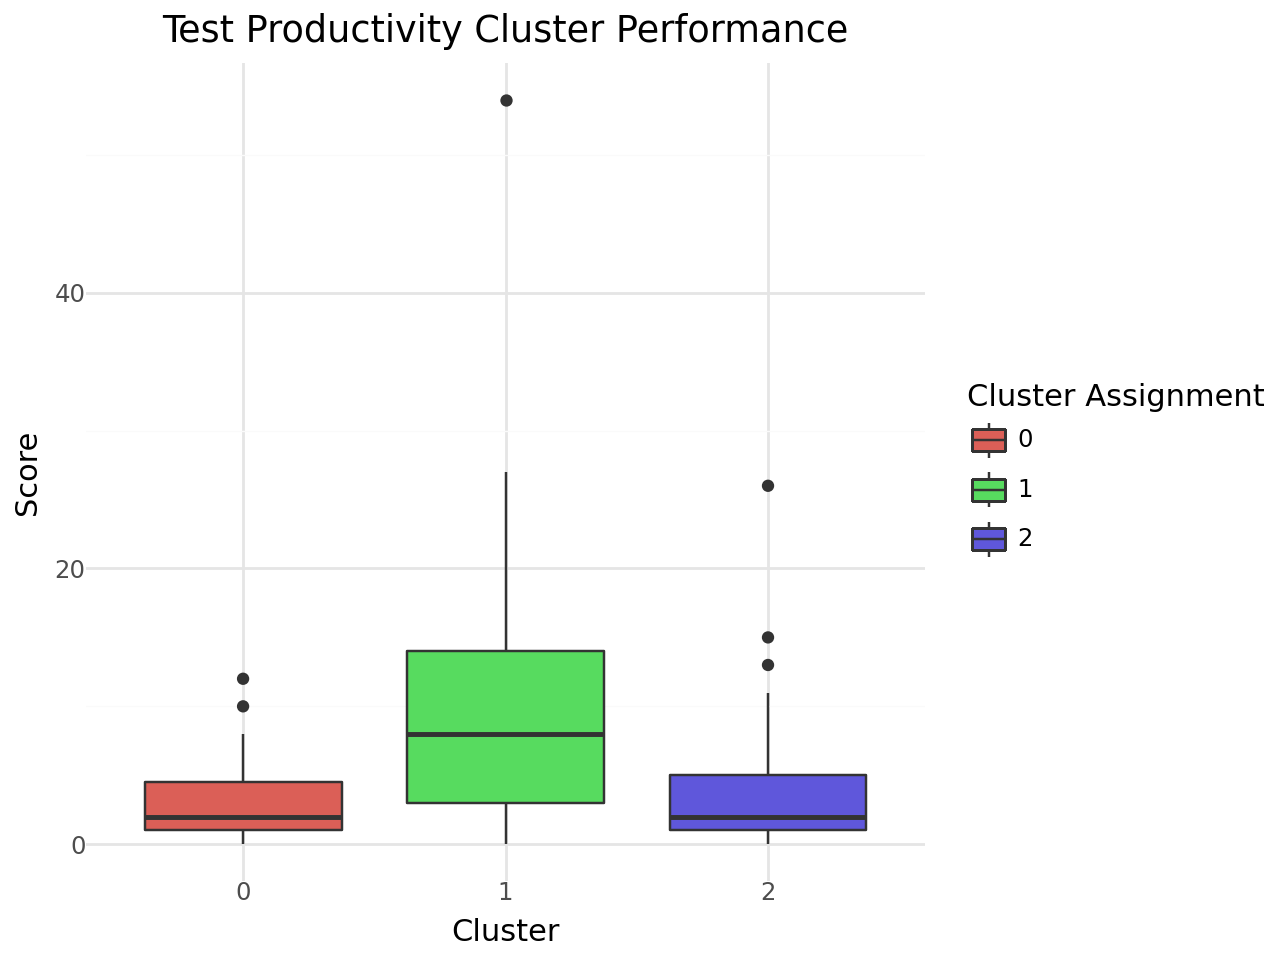

In [42]:
gg_list[1]

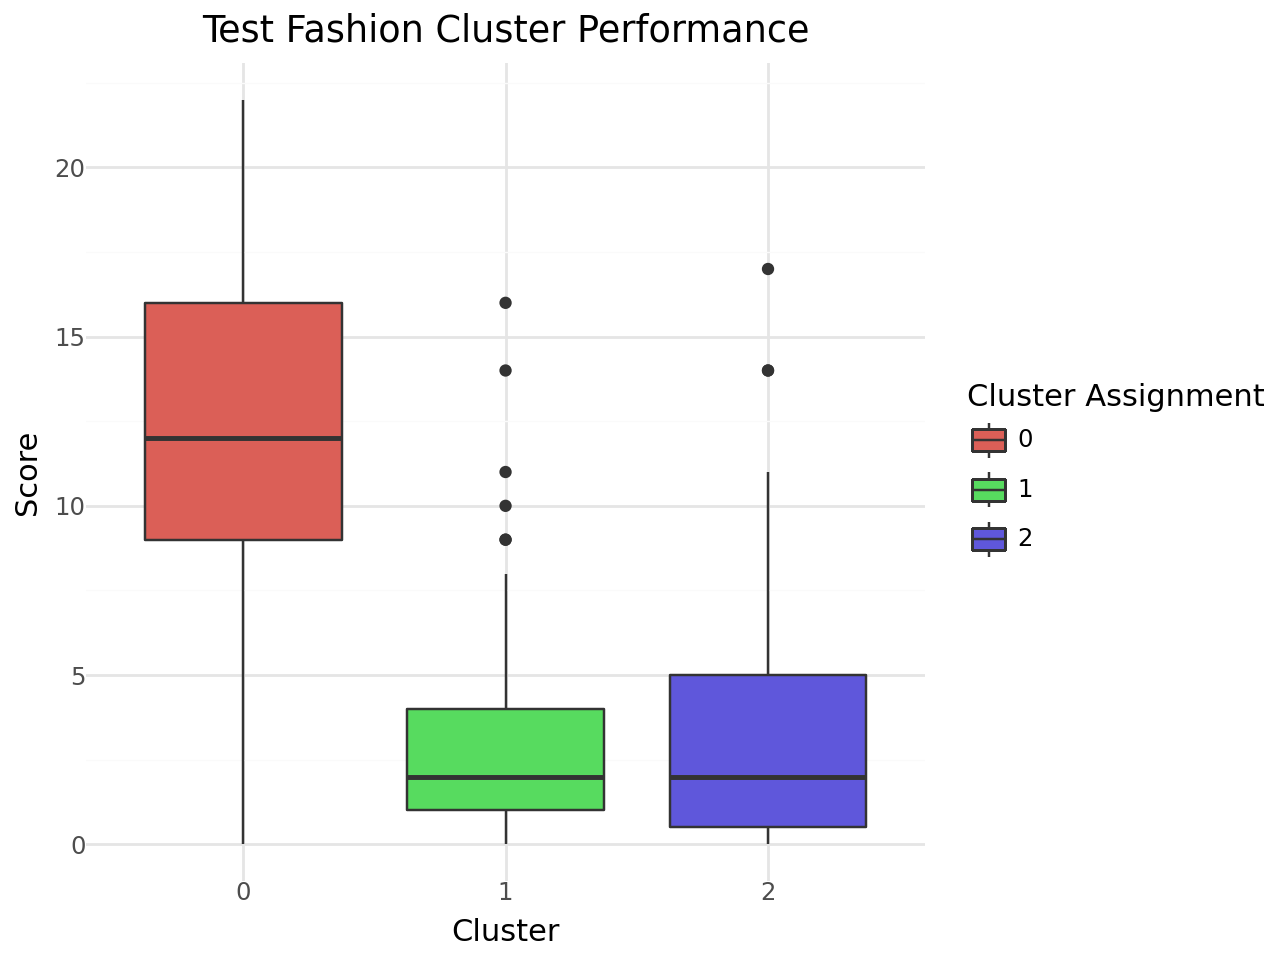

In [43]:
gg_list[2]

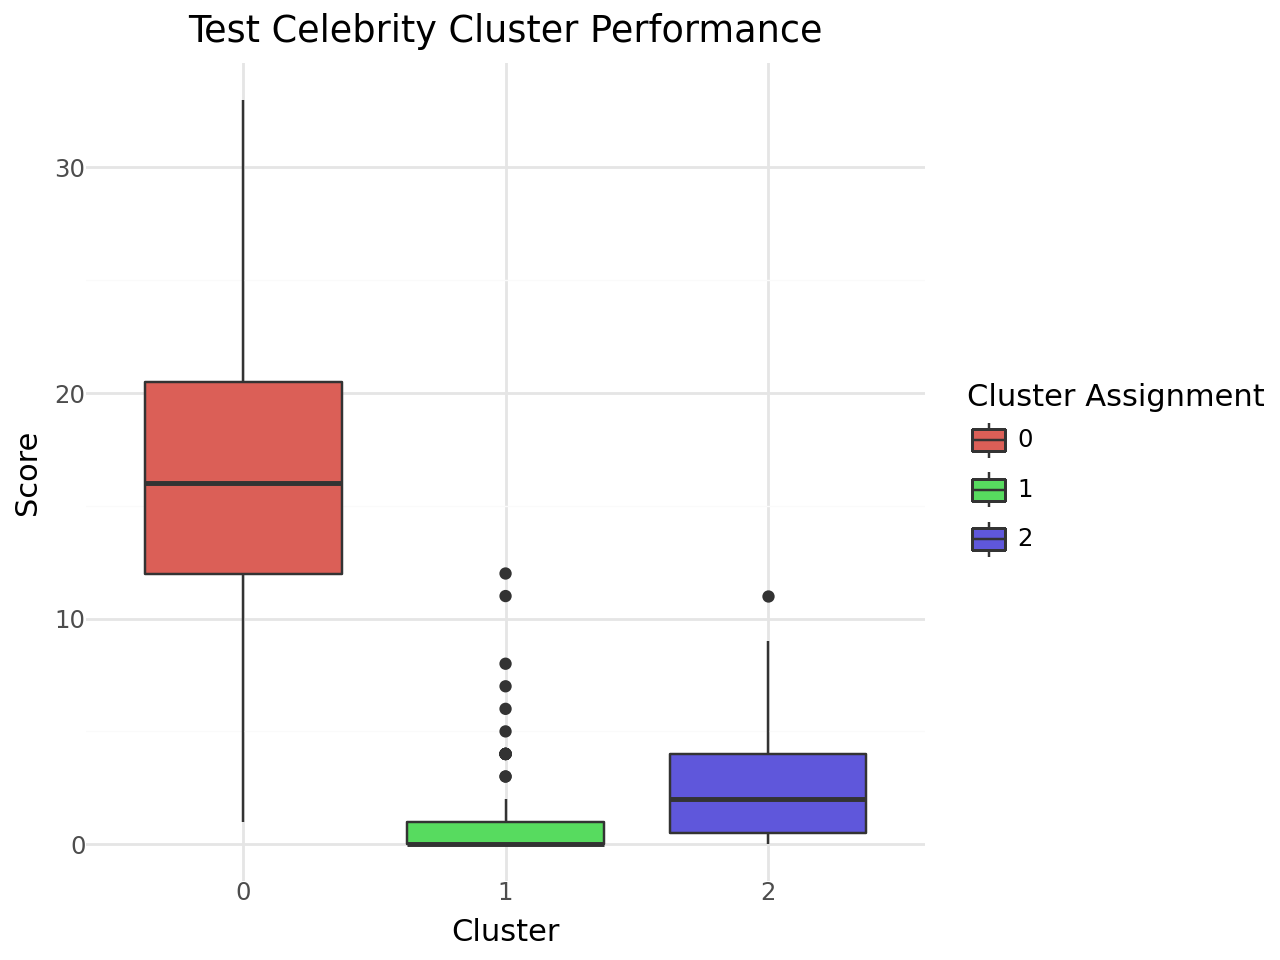

In [44]:
gg_list[3]

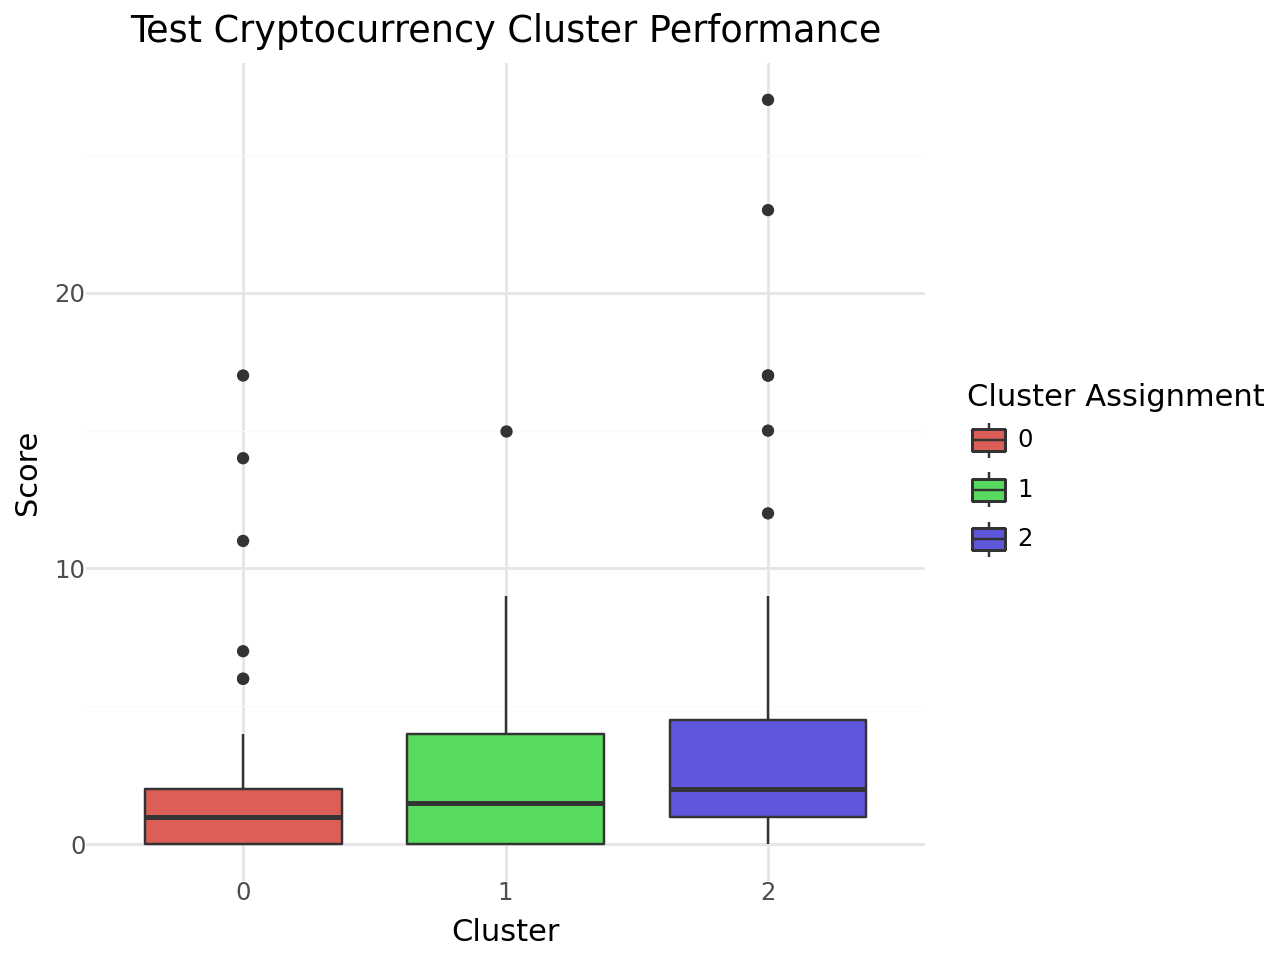

In [45]:
gg_list[4]

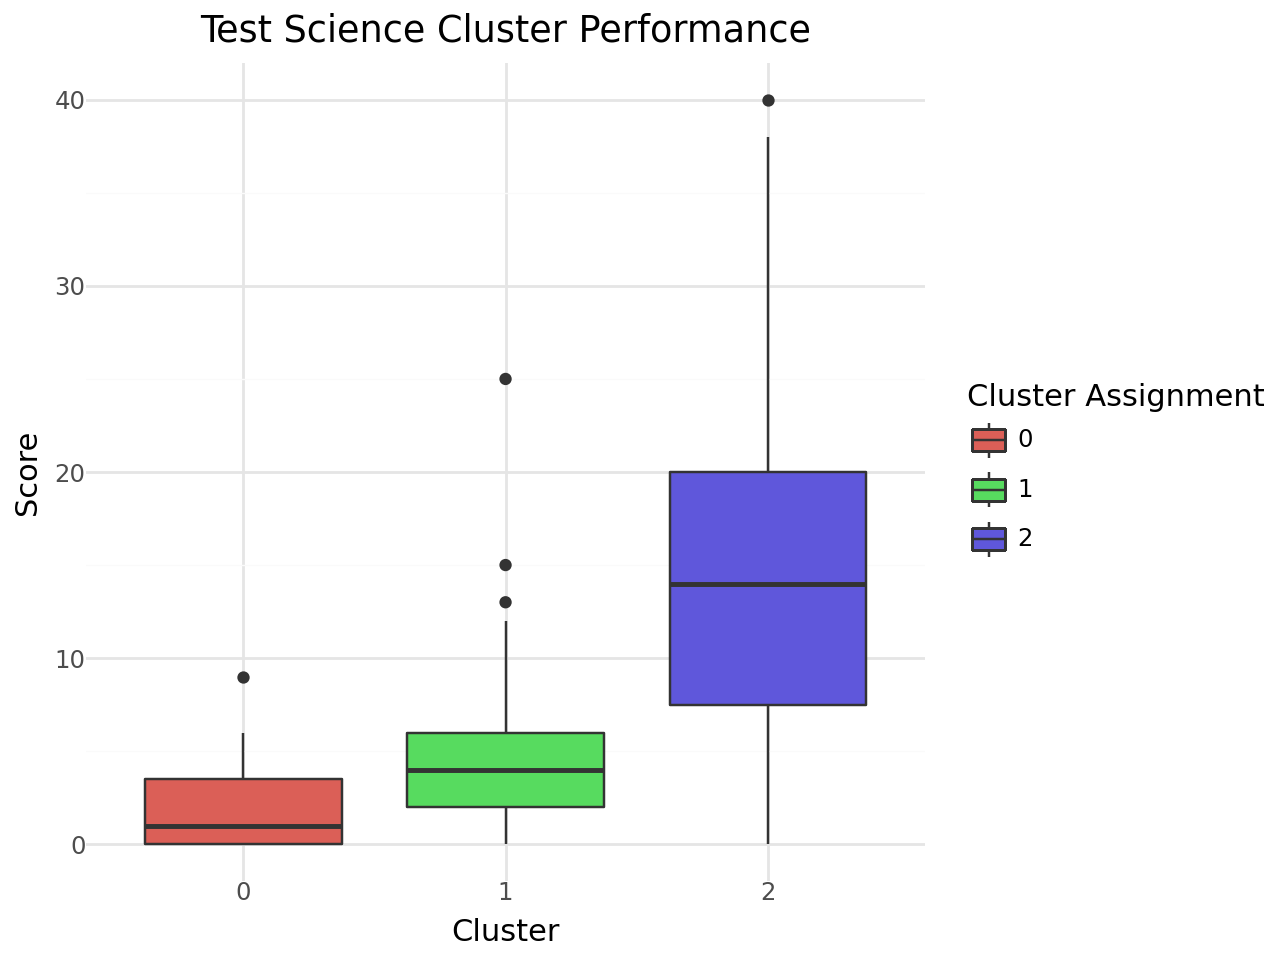

In [46]:
gg_list[5]

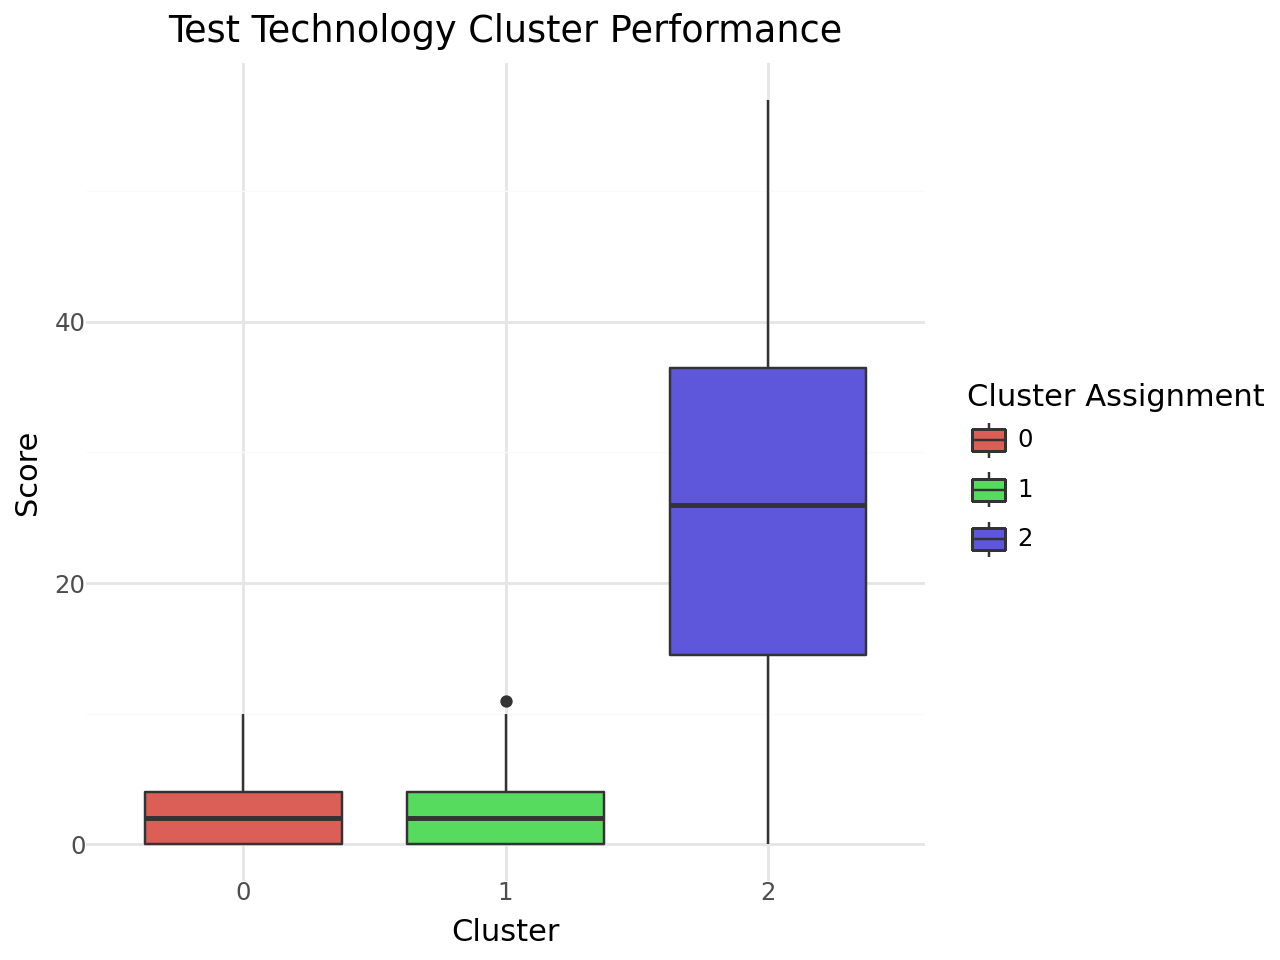

In [47]:
gg_list[6]

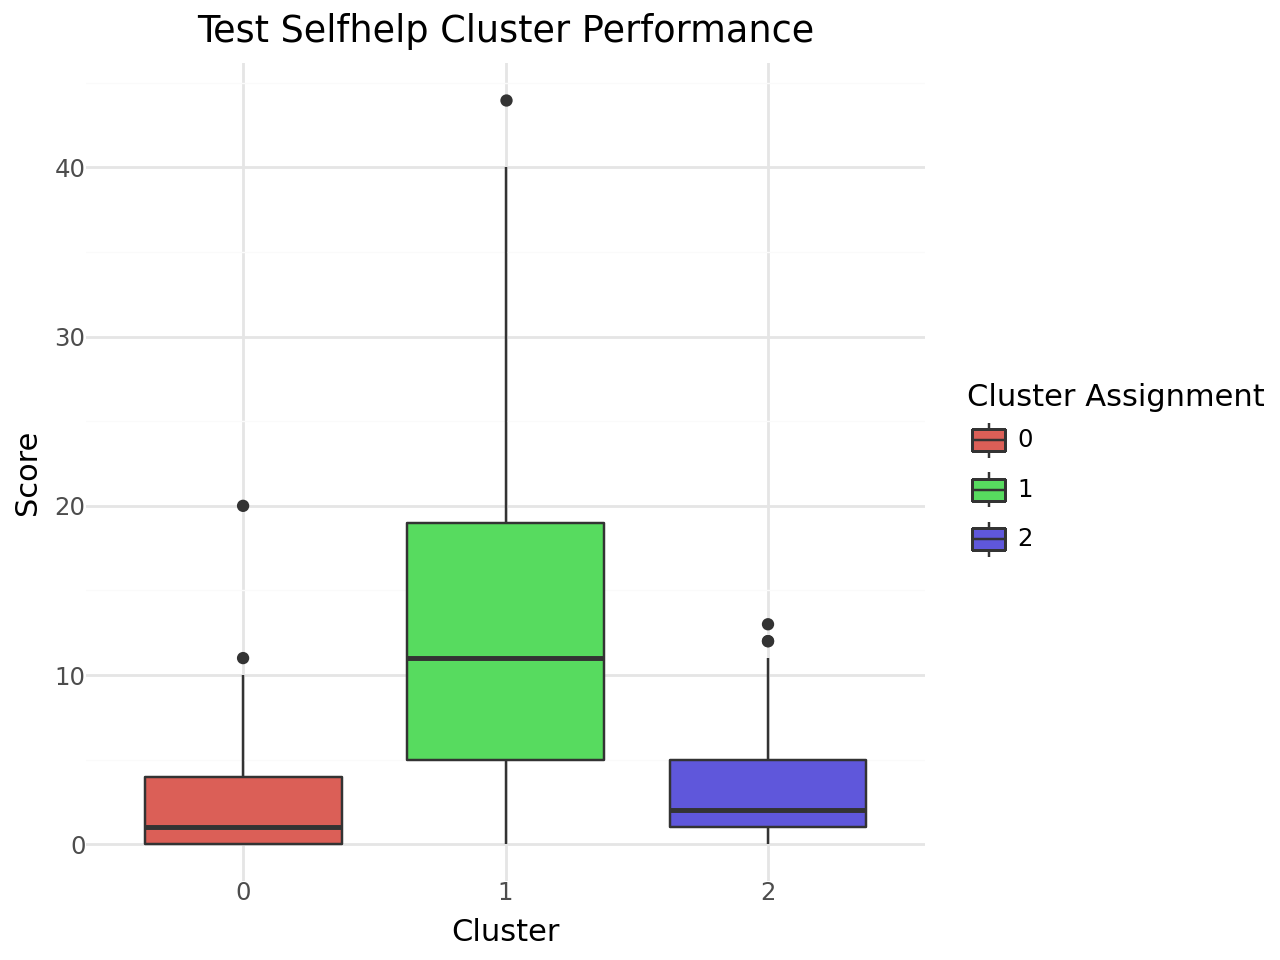

In [48]:
gg_list[7]

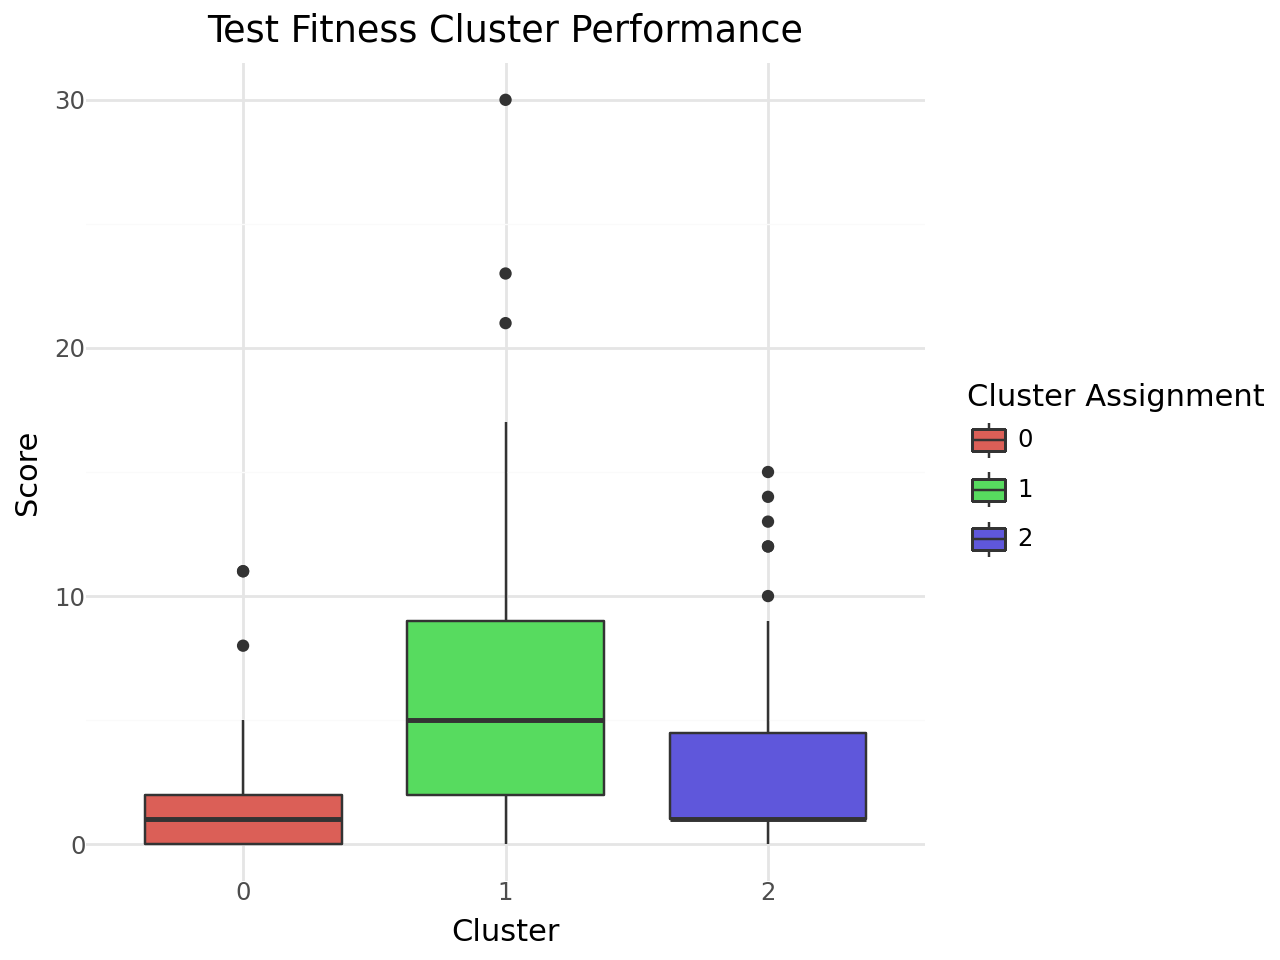

In [49]:
gg_list[8]

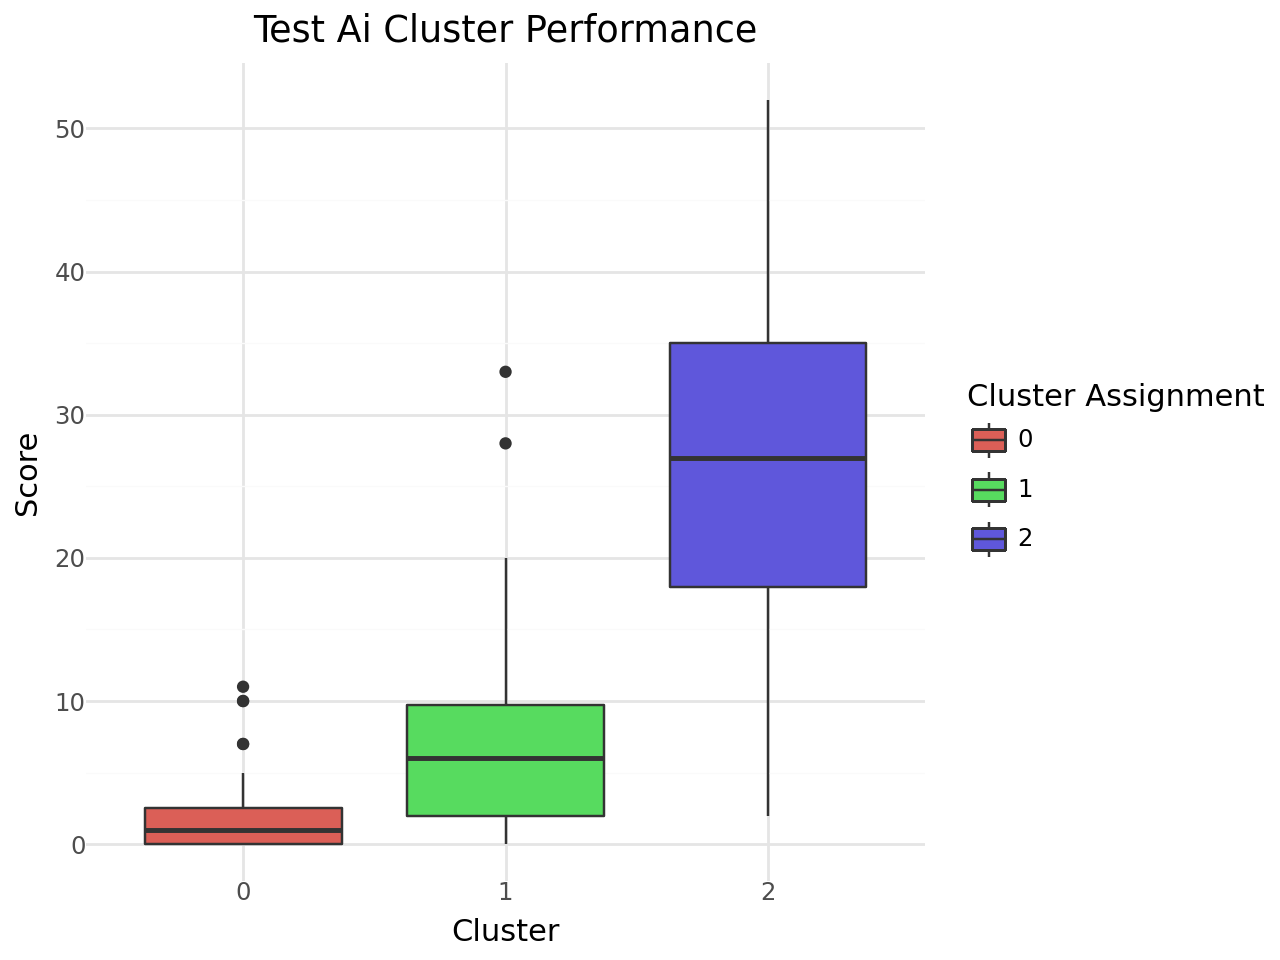

In [50]:
gg_list[9]

In [13]:
#summary table

cluster_summary = article.groupby('cluster_3')[features].agg(['mean','std'])
cluster_summary

Stocks           Productivity              Fashion            \
               mean       std         mean       std       mean       std   
cluster_3                                                                   
0          2.067797  2.455567     2.881356  2.792136  12.016949  5.447212   
1          8.256098  6.670019     9.731707  8.805230   2.804878  3.233463   
2          3.508475  3.701691     3.779661  4.548845   3.220339  3.868831   

           Celebrity           Cryptocurrency              Science            \
                mean       std           mean       std       mean       std   
cluster_3                                                                      
0          16.644068  6.310262       2.084746  3.265748   1.949153  2.160968   
1           1.219512  2.444568       2.536585  2.986369   4.597561  4.174762   
2           2.745763  2.844191       4.033898  5.558362  14.271186  8.882044   

          Technology              SelfHelp             Fitness            \
                mean        std       mean       std      mean       std   
cluster_3                                                                  
0           2.559322   2.608152   2.830508  3.714615  1.576271  2.422619   
1           2.378049   2.406987  13.097561  9.911472  6.719512  5.940600   
2          26.169492  14.283041   3.355932  3.633003  3.355932  3.929388   

                  AI             
                mean        std  
cluster_3                        
0           1.898305   2.637233  
1           6.914634   6.369684  
2          26.101695  12.793715